**Pablo Iván Bustamante Idro** 
<br/><br/>

# Prueba ingreso Sodimac S.A.
<hr/>
<br/>

## Enunciado
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Las autoridades de SF (san francisco creo) han notado que el NPS ha disminuido constantemente durante los ultimos meses. 
La red de bicicletas se financia a través de una subscripción, por lo que algo relacionado a la experiencia de los usuarios está afectando los resultados finales. <br/>
Ansiosos de tomar una desición, te encomendaron lo siguiente:<br/>
<ol>
<li>Descubrir qué está afectando la experiencia del usuario.</li>
<li>Diseñar un plan para abordar este problema (incluir un diseño de experimentación para lograrlo).</li>
</ol>

Además, les gustaría comenzar a trabajar en un modelo para predecir todos los días, el número de viajes para ese
mismo día. En este sentido, su tarea es establecer qué datos necesitarían las autoridades de SF para
saber cada mañana para hacer una predicción. <br><br>
Tenga en cuenta que su tarea no es realizar una predicción
modelo, solo necesita proponer los puntos de información necesarios para ejecutar dicha predicción.

## Descripción de la base de datos

<ul>
<li>station.csv: contiene datos que representan una estación donde los usuarios pueden recoger o devolver bicicletas.</li><br/>

<li>status.csv: datos sobre la cantidad de bicicletas y muelles disponibles para una estación y un minuto determinados.</li><br/>

<li>trips.csv: datos sobre viajes individuales en bicicleta.</li><br/>

<li>weather.csv: datos sobre el clima en un día específico para ciertos códigos postales.</li>
</ul>

## Aspectos adicionales a considerar
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Aunque formes parte de un equipo técnico, el plan debe ser aprobado por un equipo ejecutivo, por lo que las buenas visualizaciones y la perspicacia empresarial son una gran ventaja.


## Objetivos
<ol>
<li>Explorar los datos para encontrar la causa de la disminución del NPS</li>
<li>Diseñar el plan de experimentación para revertir este problema</li>
<li>Identificar la data necesaria para una predicción del numero de viajes por día del día actual</li>
<li>Embellecer precentación para su fácil entendimiento</li>
<ol>


## Análisis exploratorio


### Librerías a utilizar

In [1]:
import os 
import re
#from google.colab import drive # Librería para importar documentos desde drive #se descarta dado que no tengo suficiente memoria en google collab 
import warnings # Librería para estética del notebook
warnings.filterwarnings("ignore") #Configuracion para quitar warnings
import pandas as pd #Librería Pandas para manejo de datasets
import numpy as np #Librería Numpy para manejo de vectores
import missingno as msgn #Librería para graficar valores perdidos
import matplotlib.pyplot as plt #Librería para graficar 
import seaborn as sns #Librería para graficar 
import folium #graficar mapas
from folium import plugins #graficar mapas
from folium.plugins import HeatMap #graficar mapas


### Carga de datasets

In [2]:
#carga dataset de clima
weather_df = pd.read_csv("weather.csv")

#carga dataset de viajes individuales en bicicleta
trip_df = pd.read_csv("trip.csv")

#carga dataset de datos sobre la cantidad de bicicletas y muelles disponibles para una estación y un minuto determinados.
status_df = pd.read_csv("status.csv")

#carga dataset de datos que representan una estación donde los usuarios pueden recoger o devolver bicicletas.
station_df = pd.read_csv("station.csv")

In [3]:
continuous = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical = ['object']

### Funciones de utilidad

In [4]:
def graficar_variables(df: pd.DataFrame, var: str, type: int = 0):
    """
    Grafica una variable binaria de un DataFrame.
    Aparecerá Un Histograma.
    Parameters
    type: can be 0,1 or 2
          0: boolean.
          1: number.
          2: categoricals.
    ----------
    df: DataFrame
    var: Se debe ingresar la columna a graficar
    Returns
    -------
    Se grafica la columna indicada.
    """
    if type == 0:
        try:
            sns.distplot(df[var])
        except Exception:
            df[var].plot(kind="hist")
    elif type == 1 or 2:
        sns.countplot(df[var])
        
    plt.title(var)
    plt.tight_layout()

def chunkify(lst, n):
    
    """
    Crea una lista de lista para graficar mas facilmente
    """
    
    for i in range(0, len(lst), n):
        yield lst[i : i + n]

from typing import List


def graph_by_cols(df: pd.DataFrame, variables: List, cols: int, type=0) -> None:
    
    """
        te permite graficar en columnas usando chunks
    """
    
    if cols < 1:
        raise Exception("Tamaño del chunk debe ser mayor a 0")

    chunks = chunkify(variables, cols)
    for chunk in chunks:
        fig = plt.figure(figsize=(30, 12))
        fig.subplots_adjust(hspace=0.2, wspace=0.2)
        for idx, var in enumerate(chunk, 1):
            ax = fig.add_subplot(3, 5, idx)
            ax.tick_params(axis='x', rotation=90)
            graficar_variables(df, var, type=type)
            
def grouped_scatterplot_sb(dataframe, x, y, group_by):
    """
        te permite graficar facetas de una agregadas de la data que quieres mostrar. 
        por ejemplo data separada por ciudad
    """
    g = sns.FacetGrid(dataframe, col=group_by)
    g = g.map(sns.scatterplot,x,y)
    for ax in g.axes.flat:
        labels = ax.get_xticklabels() # get x labels
        for i,l in enumerate(labels):
            if(i%2 == 0): labels[i] = '' # skip even labels
        ax.set_xticklabels(labels, rotation=90) # set new labels
    plt.show()

    
def grouped_histplot_sb(dataframe, x, group_by):
    """
        te permite graficar facetas de una agregadas de la data que quieres mostrar. 
        por ejemplo data separada por ciudad
    """
    g = sns.FacetGrid(dataframe, col=group_by)
    g = g.map(sns.histplot,x)
    for ax in g.axes.flat:
        labels = ax.get_xticklabels() # get x labels
        for i,l in enumerate(labels):
            if(i%2 == 0): labels[i] = '' # skip even labels
        ax.set_xticklabels(labels, rotation=90) # set new labels
    plt.show()


def explorador_df(df):
  #funcion que recibe un dataframe y entrega un resumen
  print(f'el dataset contiene {df.shape[1]} columnas y {df.shape[0]} registros \n')
  print(f'Las columnas y el tipo de dato de cada columna son las siguientes: \n \n {df.dtypes}\n \n ')
  print(f'Los valores unicos de cada columna son los siguientes: \n \n ')
  for i in df.columns:
      print(f"\n \n Columna {i}:\n \n {df[i].unique()} \n \n") 

### Dataset de clima

#### Análisis descriptivo previo al procesado

In [5]:
explorador_df(weather_df)

el dataset contiene 24 columnas y 3665 registros 

Las columnas y el tipo de dato de cada columna son las siguientes: 
 
 date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       floa

##### Observaciones análisis descriptivo
Con este primer vistazo se identifica que la data de clima contiene indicadores meteorológicos de cinco codigos postales diferentes (que por el momento no sabemos a qué ciudades corresponde), que hay historia de almenos dos años entre finales de agosto del 2013 y finales de agosto del 2015. <br/> <br/>
También se aprecia que la variable zip_code y cloud_cover se debe transformar a variable categórica y que la variable zip_code debe ser recodificada por su ciudad preteneciente para mejor entendimiento.
<br/> <br/>
Finalmente se identifica que la variable events y precipitation_inches deben ser recodificadas. La primera debido a que se pierden muchos valores los cuales corresponden a un día normal y la segunda al contener la estandarización T como registro corrompe toda la serie numérica de la medición. Además los registros rain de events se dividen en dos debido a un error tipográfico que será corregido en una recodificación.


##### Mapeo de codigos postal con nombre de ciudad
<ul>
    <li>95113 - San Jose</li>
    <li>94301 - Palo Alto</li>
    <li>94107 - San Francisco</li>
    <li>94063 - Redwood City</li>
    <li>94041 - Mountain View</li>
</ul>

In [6]:
codpost_a_ciudad = dict()
codpost_a_ciudad[95113] = 'San Jose'
codpost_a_ciudad[94301] = 'Palo Alto'
codpost_a_ciudad[94107] = 'San Francisco'
codpost_a_ciudad[94063] = 'Redwood City'
codpost_a_ciudad[94041] = 'Mountain View'
weather_df["zip_code"] = weather_df.zip_code.apply(lambda x:codpost_a_ciudad[x])


##### Recodificacion de precipitaciones
Segun https://www.thoughtco.com/what-is-trace-of-precipitation-3444238 el valor de medición T es equivalente a 0.00 por ende al hacer este reemplazo en el dataset podremos tener una serie numérica continua más fácil de trabajar.

In [7]:
weather_df['precipitation_inches'] = pd.to_numeric(weather_df['precipitation_inches'], errors = 'coerce')


##### Recodificación de events
Se reemplazaran los registros nulos de events por la palabra "Normal" debido a que se observa una mal asignación.

In [8]:
weather_df.loc[weather_df.events.isnull(), 'events'] = "Normal"
weather_df.loc[weather_df["events"] == 'rain', 'events'] = 'Rain'

##### Transformación tipo de dato 
La columna cloud_cover al tener tan pocos valores se transformará de int a object para diferenciarla como variable categórica y evitar errores.
weather_df['precipitation_inches'] = pd.to_numeric(weather_df['precipitation_inches'], errors = 'coerce')

In [9]:
weather_df['cloud_cover'] = weather_df['cloud_cover'].map(str)

La columna date será transformada a datetime para no tener problemas de ordenamiento de indices en series de tiempo

In [10]:
 weather_df['date'] = weather_df['date'].astype('datetime64[ns]')

#### Análisis descriptivo post al procesado

In [11]:
explorador_df(weather_df)

el dataset contiene 24 columnas y 3665 registros 

Las columnas y el tipo de dato de cada columna son las siguientes: 
 
 date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      floa

In [13]:
weather_df.head(5)

date  max_temperature_f  mean_temperature_f  min_temperature_f  \
0 2013-08-29               74.0                68.0               61.0   
1 2013-08-30               78.0                69.0               60.0   
2 2013-08-31               71.0                64.0               57.0   
3 2013-09-01               74.0                66.0               58.0   
4 2013-09-02               75.0                69.0               62.0   

   max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
0             61.0              58.0             56.0          93.0   
1             61.0              58.0             56.0          90.0   
2             57.0              56.0             54.0          93.0   
3             60.0              56.0             53.0          87.0   
4             61.0              60.0             58.0          93.0   

   mean_humidity  min_humidity  ...  mean_visibility_miles  \
0           75.0          57.0  ...                   10.0   
1           70.0          50.0  ...                   10.0   
2           75.0          57.0  ...                   10.0   
3           68.0          49.0  ...                   10.0   
4           77.0          61.0  ...                   10.0   

   min_visibility_miles  max_wind_Speed_mph  mean_wind_speed_mph  \
0                  10.0                23.0                 11.0   
1                   7.0                29.0                 13.0   
2                  10.0                26.0                 15.0   
3                  10.0                25.0                 13.0   
4                   6.0                23.0                 12.0   

   max_gust_speed_mph  precipitation_inches  cloud_cover  events  \
0                28.0                   0.0          4.0  Normal   
1                35.0                   0.0          2.0  Normal   
2                31.0                   0.0          4.0  Normal   
3                29.0                   0.0          4.0  Normal   
4                30.0                   0.0          6.0  Normal   

   wind_dir_degrees       zip_code  
0             286.0  San Francisco  
1             291.0  San Francisco  
2             284.0  San Francisco  
3             284.0  San Francisco  
4             277.0  San Francisco  

[5 rows x 24 columns]

Se observa que las transformaciones aplicadas no presentan ningun tipo de problema.

#### Análisis visual

##### Separación de variables categóricas y continuas
A continuación se procede a separar las variables segun su naturaleza para facilitar taréas de exploración visual

In [14]:
continuous = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical = ['object']

weather_continuous_columns = weather_df.select_dtypes(include=continuous).columns
weather_categorical_columns = weather_df.select_dtypes(include=categorical).columns

##### Análisis de distribución de variables continuas

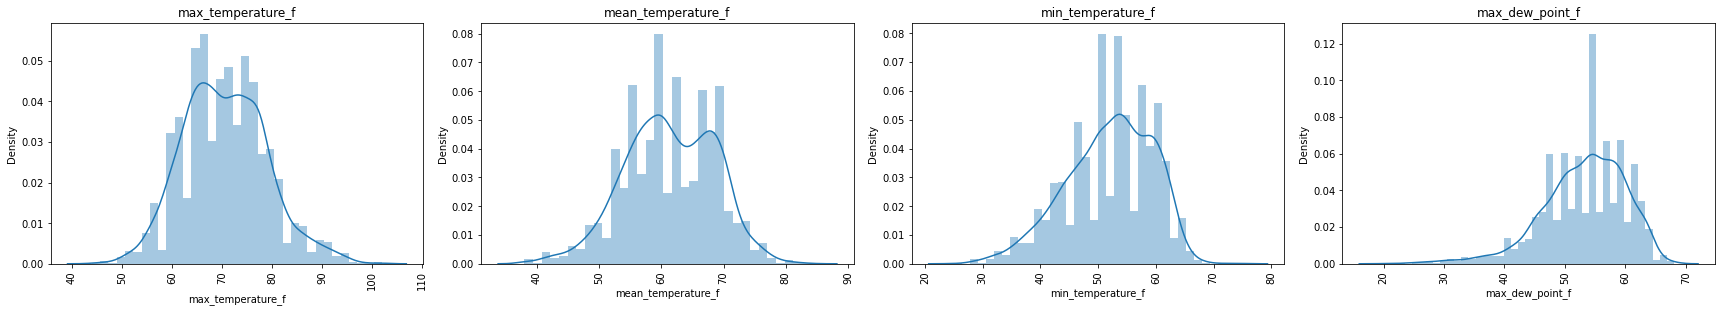

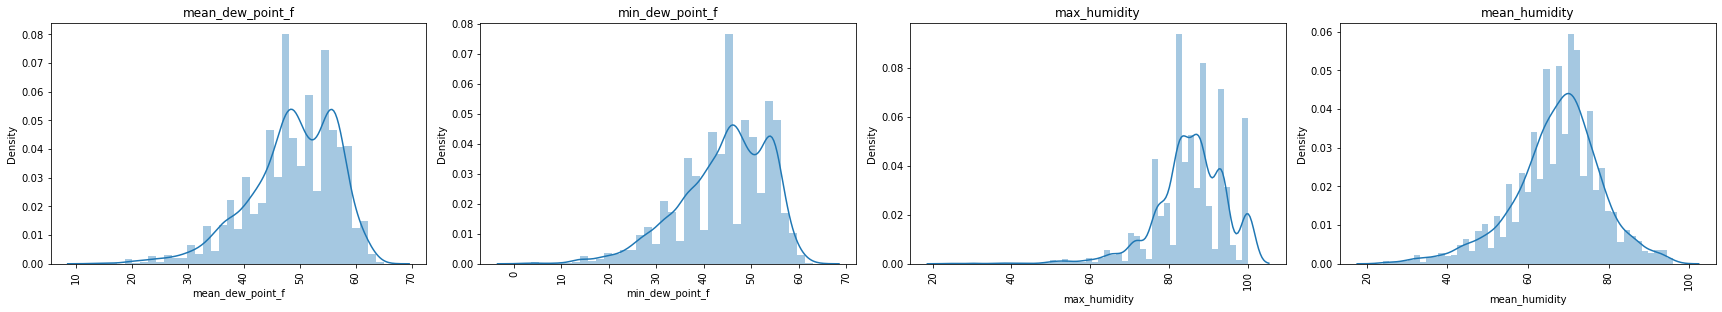

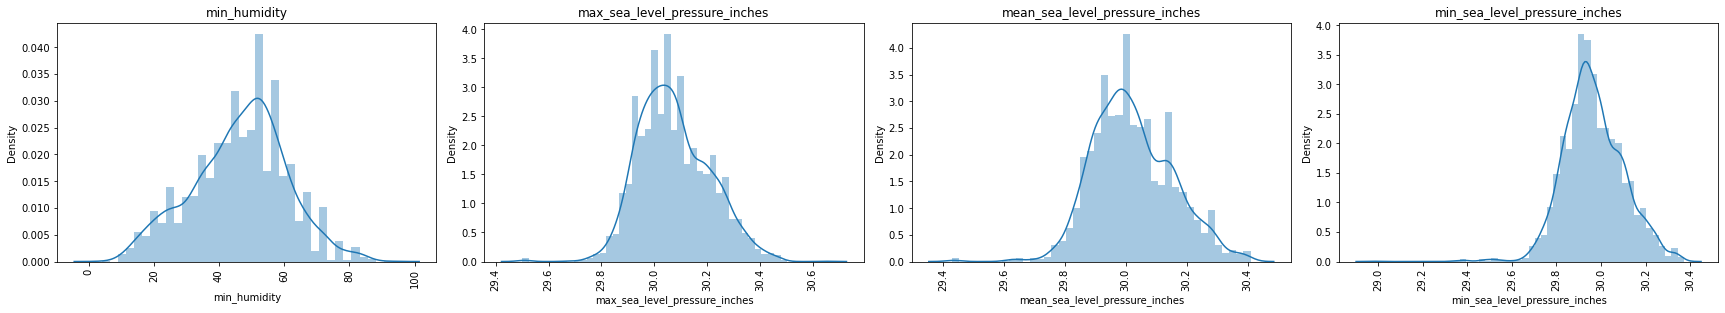

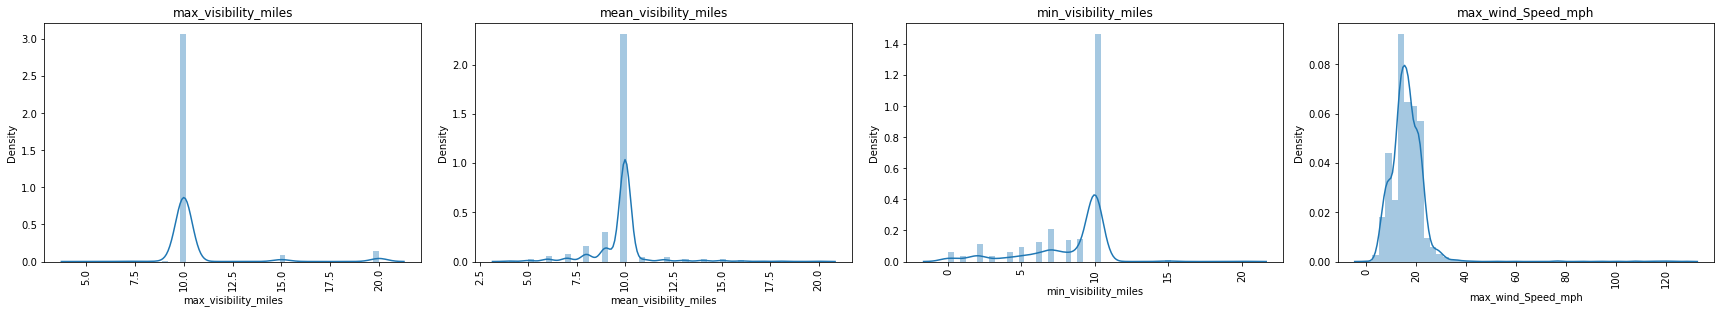

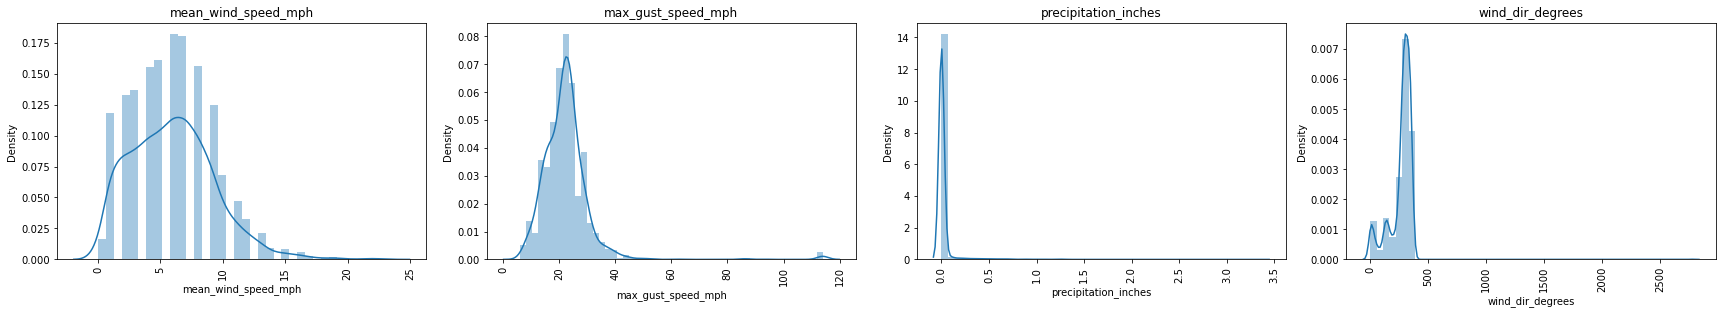

In [15]:
graph_by_cols(weather_df, weather_continuous_columns, 4) 

Se observa que la mayoría de las variables continuas tienden a formar una campana gauss. Será necesario normalizar y reescalar las variables más adelante en el análisis.

##### Análisis de conteo de variables categóricas

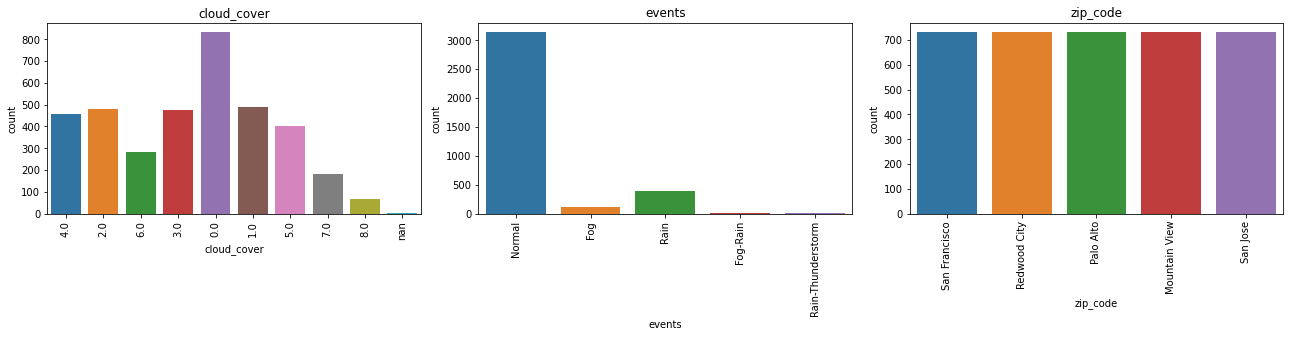

In [16]:
graph_by_cols(weather_df, weather_categorical_columns, 4,2) 

se aprecia más notoriamente los criterios por los cuales se debe análizar la muestra, en este caso las ciudades y sus eventos.

##### Análisis visual de valores nulos

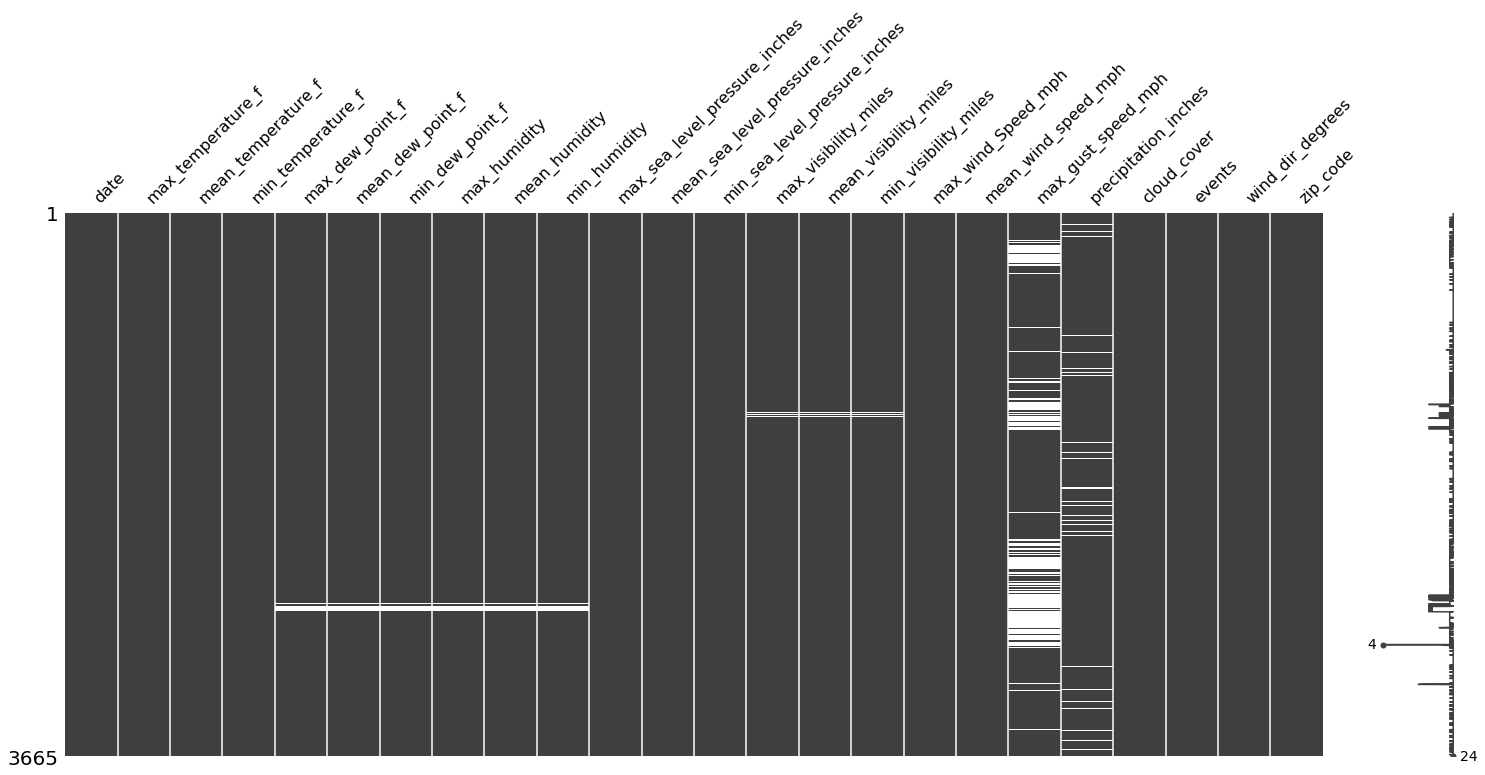

In [17]:
msgn.matrix(weather_df); 

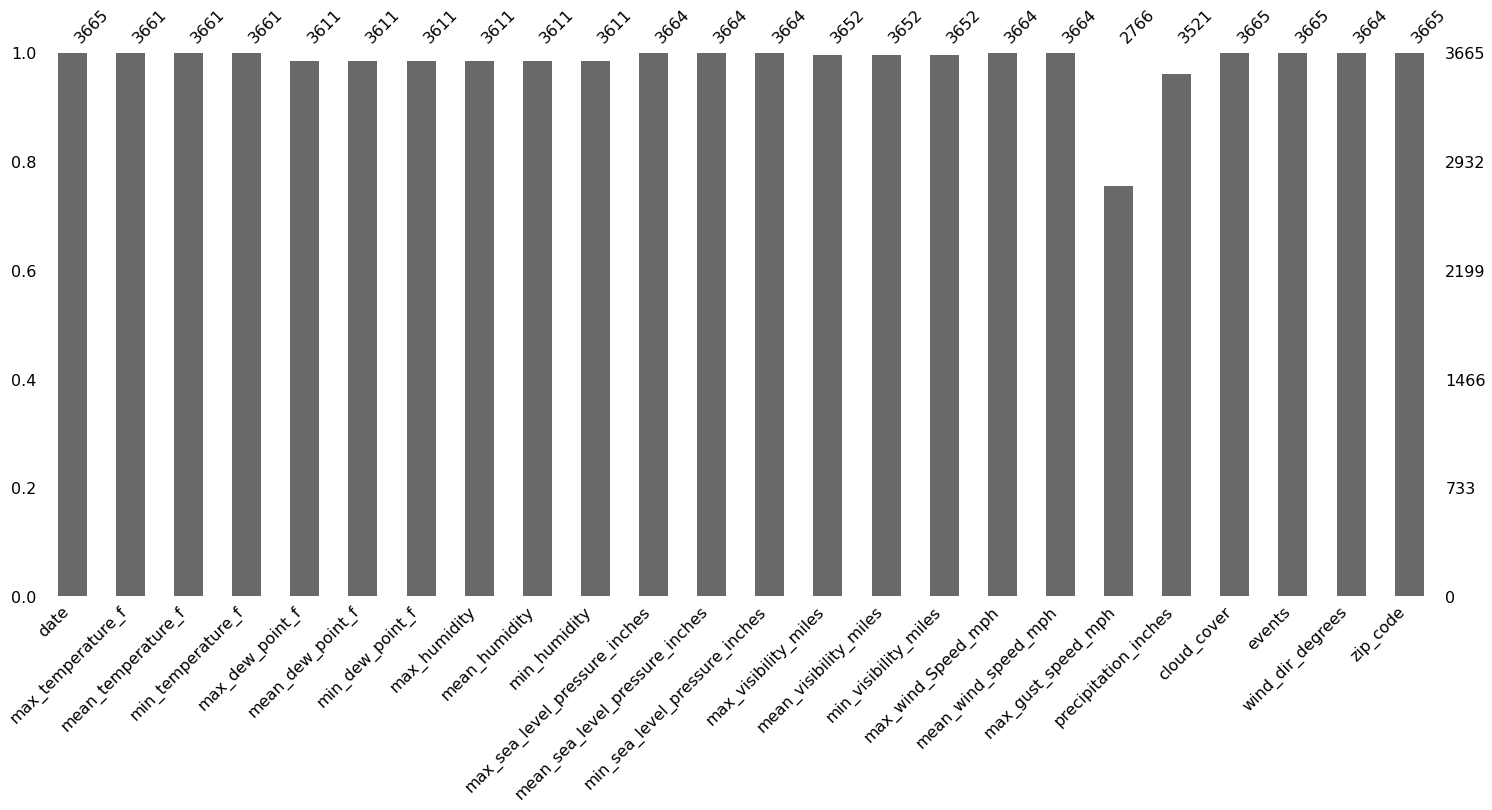

In [18]:
msgn.bar(weather_df) ;

Se observa que la variable  max_gust_speed_mph presenta una gran cantidad de valores nulos, probablemente se excluyan de la muestra. Así mismo la variable de precipitaciones presenta valores nulos pero no muchos por lo que se mantendrá

##### Análisis visual de correlación pearson de variables

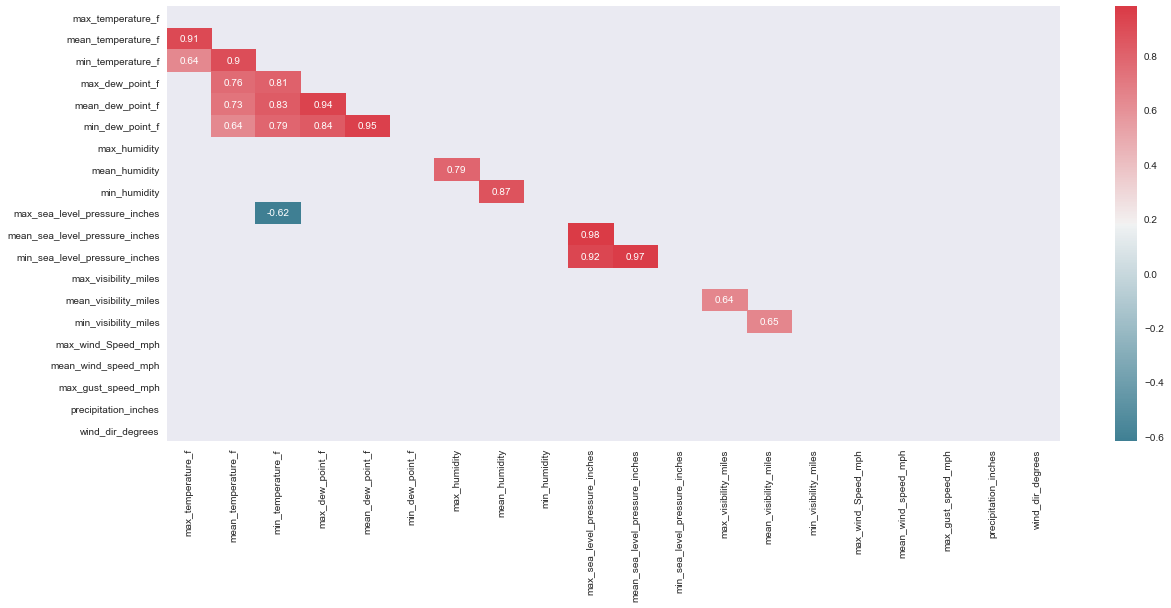

In [19]:

# heatmap con las correlaciones de las variables
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20,8)
corr = weather_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr[abs(corr)>0.6], annot=True, mask = mask, cmap = cmap);

Segun se observa, podríamos excluir las columnas de maximos y minimos debido a su alta correlación con las columnas de media. Se procede a eliminar dew_point de las columnas también debido a que está altamente correlacionado a la temperatura por ende me sirve solo la temperatura para explicar la situación de la ciudad.

In [21]:
weather_df = weather_df.loc[:,['mean_temperature_f', 'mean_humidity', 'mean_sea_level_pressure_inches', 'mean_visibility_miles','cloud_cover','zip_code','wind_dir_degrees','precipitation_inches','events','date']]
weather_continuous_columns = weather_df.columns

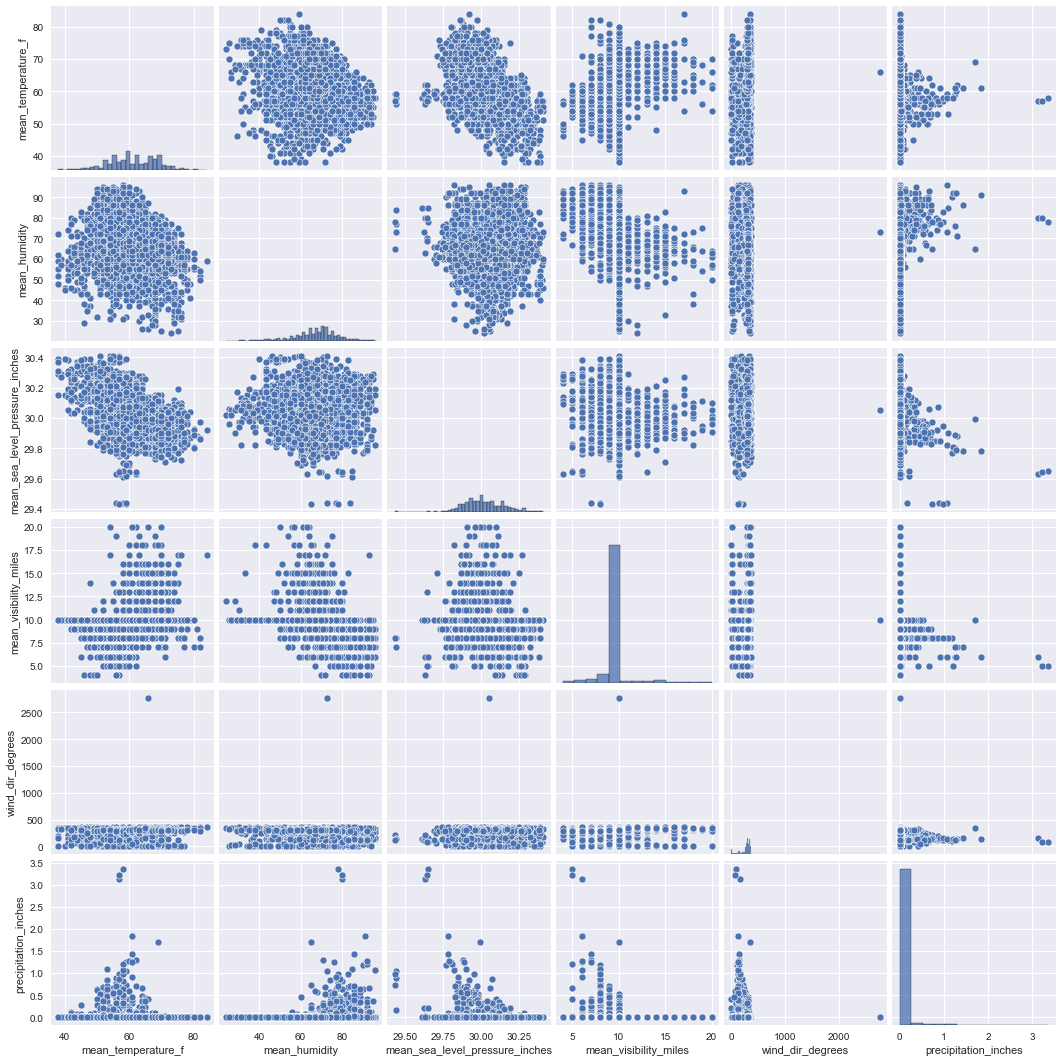

In [23]:
 sns.pairplot(weather_df);

Se procede a hacer un análisis de las variables agrupadas por ciudad

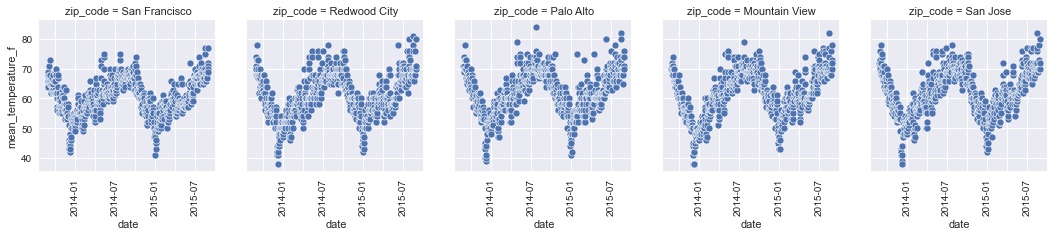

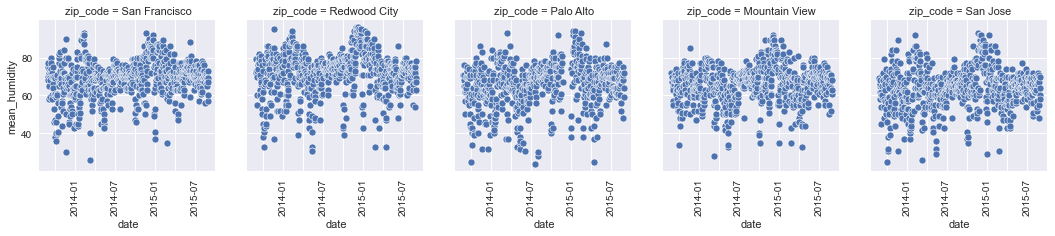

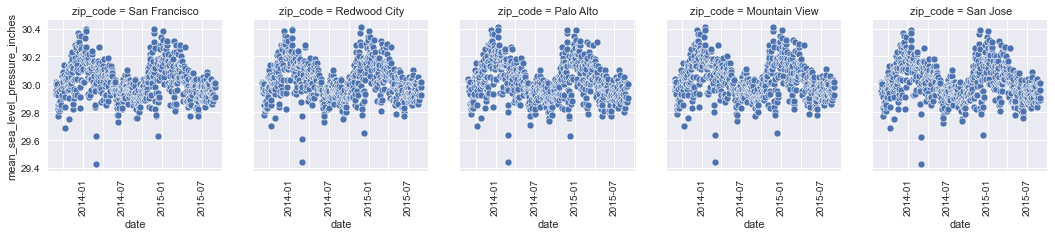

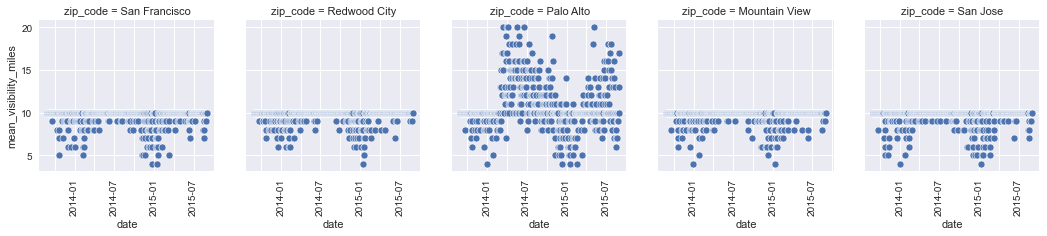

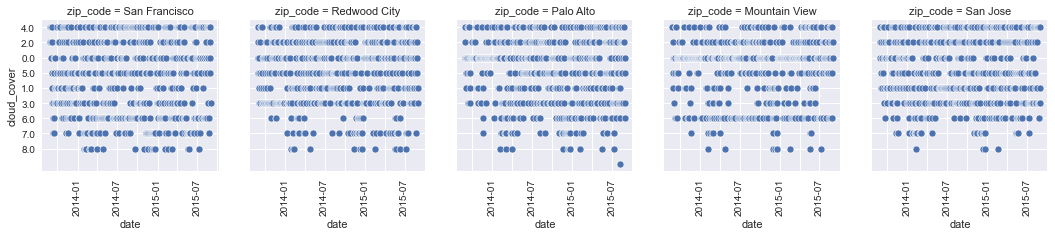

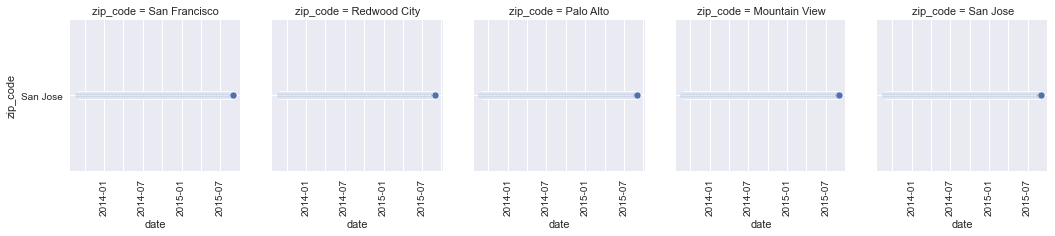

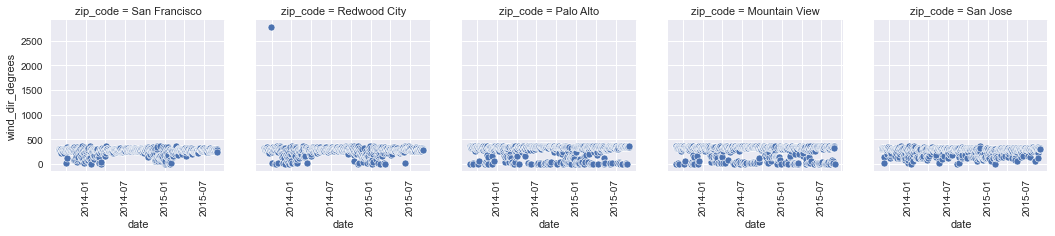

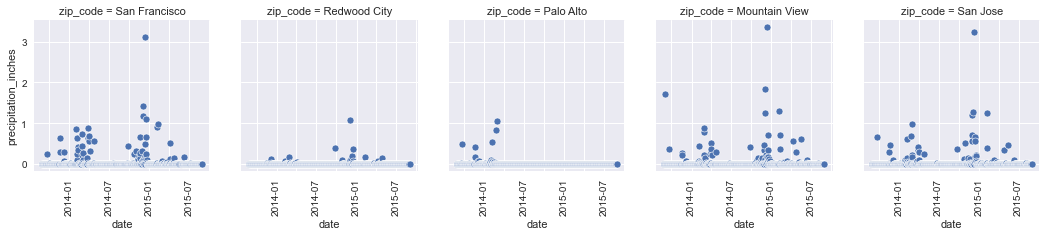

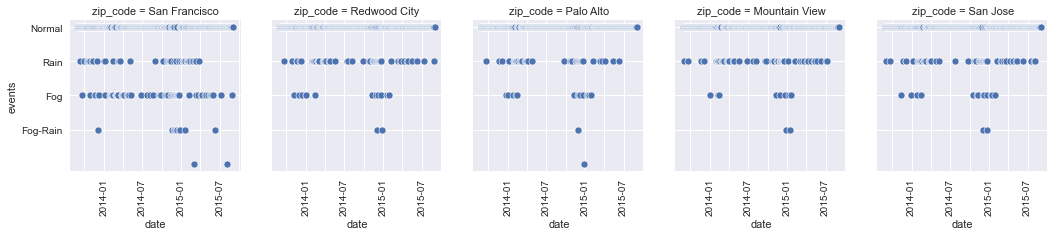

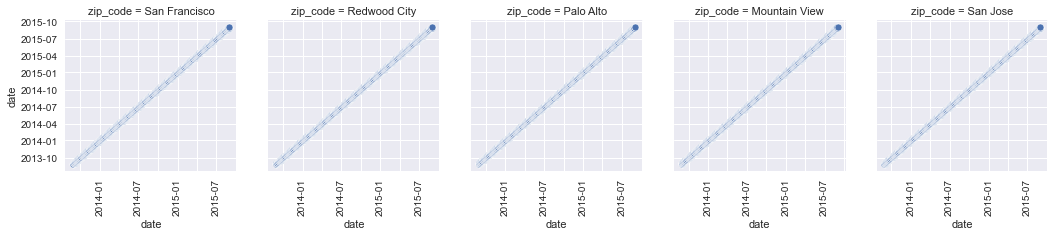

In [24]:
for i in range(len(weather_continuous_columns)):
    grouped_scatterplot_sb(weather_df, 'date', weather_continuous_columns[i], 'zip_code') 

Se procede a hacer un análisis de las variables agrupadas por evento climático

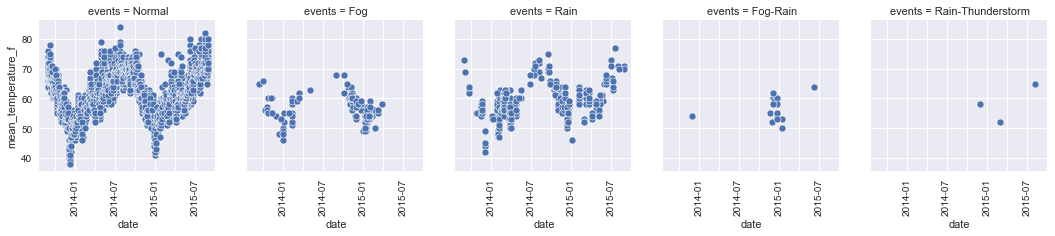

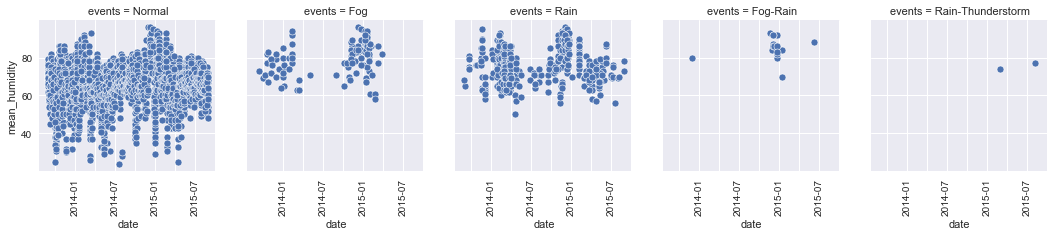

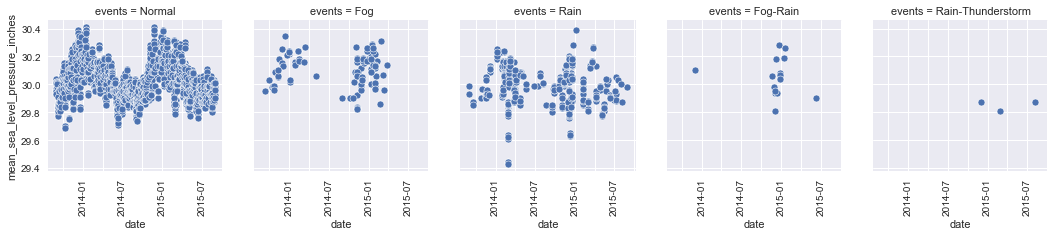

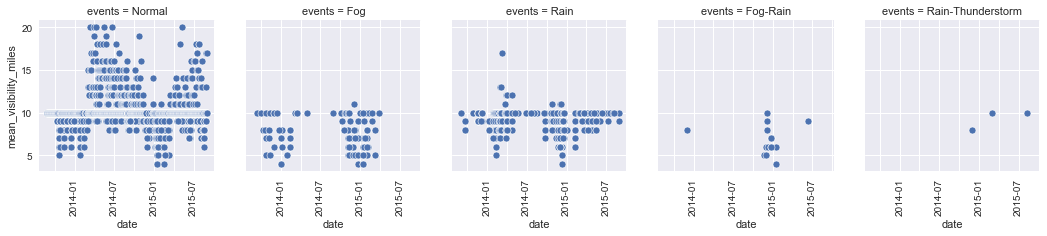

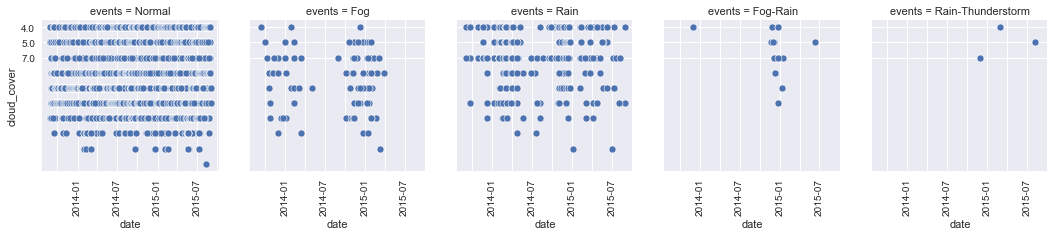

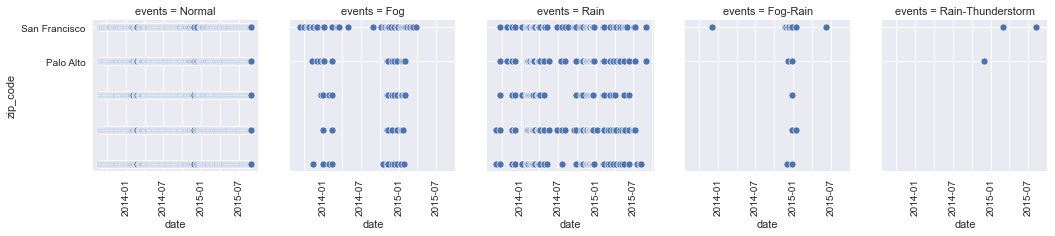

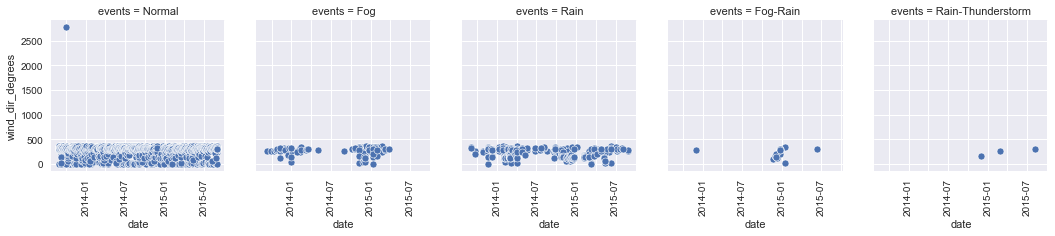

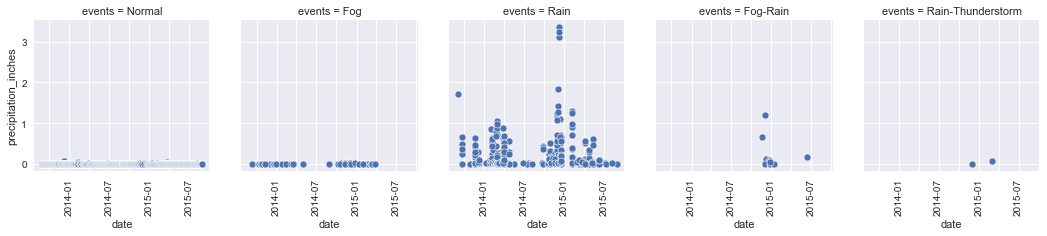

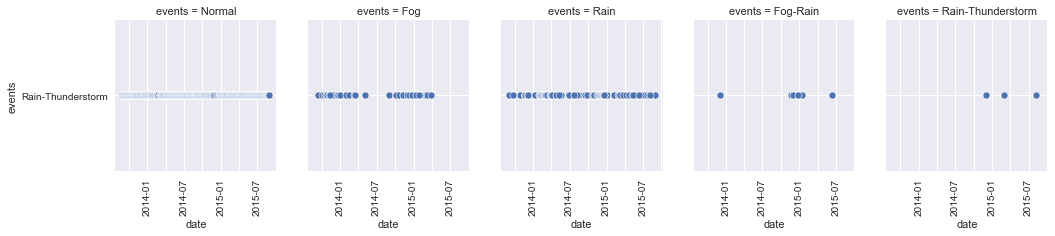

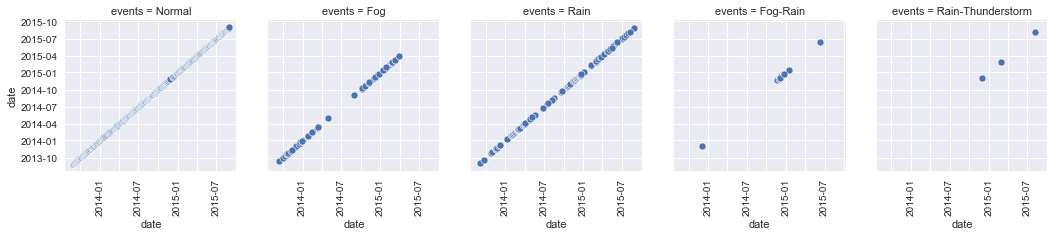

In [25]:
for i in range(len(weather_continuous_columns)):
    grouped_scatterplot_sb(weather_df, 'date', weather_continuous_columns[i], 'events') 

##### Concluciones análisis visual
<ul>
<li>Además las variables categóricas y continuas ya se ven lo suficientemente higiénicas para trabajar. </li>

<li>Respecto a las variables nulas se eliminó la más conflictiva max_gustspeed. </li>

<li>El análisis multivariado concluye con que las cinco ciudades alcanzan sus minimos de temperatura los meses cercanos a enero y su máximo los meses cercanos a agosto y que sus temperaturas son muy similares. </li>

<li>También se observa que las cinco ciudades son zonas bastante humedas durante todo el año. </li>

<li>Las millas de distancia de visibilidad son bastante buenas durante todo el año sin embargo paloalto posee una visibilidad superior los meses más calurosos-secos. </li>

<li>A pesar de que llueve casi todo el año, la cantidad de lluvia que cae en San Francisco, Mountain View y San José es bastante los meses cercanos a enero. </li>
</ul>



### Dataset de viajes individuales

#### Análisis descriptivo previo al procesado

In [26]:
explorador_df(trip_df)

el dataset contiene 11 columnas y 669959 registros 

Las columnas y el tipo de dato de cada columna son las siguientes: 
 
 id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object
 
 
Los valores unicos de cada columna son los siguientes: 
 
 

 
 Columna id:
 
 [  4576   4607   4130 ... 432949 432948 432947] 
 


 
 Columna duration:
 
 [   63    70    71 ... 17396 17297  6712] 
 


 
 Columna start_date:
 
 ['8/29/2013 14:13' '8/29/2013 14:42' '8/29/2013 10:16' ... '9/1/2014 4:21'
 '9/1/2014 3:16' '9/1/2014 0:05'] 
 


 
 Columna start_station_name:
 
 ['South Van Ness at Market' 'San Jose City Hall' 'Mountain View City Hall'
 'Golden Gate at Polk' 'Santa Clara at Almaden' 'San Salvador at 1st'
 'Spear at Folsom


 
 Columna zip_code:
 
 ['94127' '95138' '97214' ... '2400105' '1004004' '29609'] 
 



##### Observaciones análisis descriptivo

Se observa que se debe cambiar el tipo de dato a las variables terminadas en _id para asignarlas al grupo de variables categóricas, salvo la columna id  la cual será removida del dataframe debido a que tenemos index.

Que la columna duration debería estar en minutos para su fácil entendimiento.

Se debe transformar los tipos de dato fecha para separarla de las variables categóricas.

Se debe extraer los días de la semana, el més y la hora de inicio de recorrido de las fechas para posteriores análisis.

Se debe eliminar las variables id de las estaciones debido a que ya nos la explica la variable que lleva el nombre

Se debe limpiar los outliers de la variable duration

A pesar de la evidente repetición de ID, con Nombre de estaciones, se mantienen las columnas en caso de que se deba cruzar

##### modificaciones del análisis


In [27]:
#se bota variable id debido a que se tiene el dataset indexado
trip_df = trip_df.drop(['id'], axis=1)

#se cambia tipo de dato a variables para definirlas como categoricas
trip_df['start_station_id'] =trip_df['start_station_id'].map(str)
trip_df['start_station_id'] =trip_df['start_station_id'].map(str)
trip_df['end_station_id'] =trip_df['end_station_id'].map(str)
trip_df['bike_id'] =trip_df['bike_id'].map(str)

#se cambia tipo de dato a variable para definirlas como datetime
trip_df['end_date'] = trip_df['end_date'].astype('datetime64[ns]')
trip_df['start_date'] = trip_df['start_date'].astype('datetime64[ns]')

#se crean nuevas columnas para tener información adicional sobre el análisis
trip_df['day'] = trip_df['start_date'].dt.strftime('%A') #dia de la semana que inicia viaje
trip_df['month'] = trip_df['start_date'].dt.strftime('%b')#mes que inicia viaje
trip_df['hour'] = trip_df['start_date'].dt.strftime('%H').astype(int)

#se eliminan valores outlier de la variable duration
trip_df['duration']=(trip_df['duration']/60).astype(int)
trip_df['percentile_99'] = np.percentile(trip_df['duration'], 99)
trip_df['outlier_duration']=trip_df['percentile_99']>trip_df['duration'] 
trip_df = trip_df[trip_df["outlier_duration"] == True]
trip_df = trip_df.drop(['percentile_99','outlier_duration'], axis=1)


#### Análisis visual

##### Separación de variables categóricas y continuas
A continuación se procede a separar las variables segun su naturaleza para facilitar taréas de exploración visual

In [28]:
trips_continuous_columns = trip_df.select_dtypes(include=continuous).columns
trips_categorical_columns = trip_df.select_dtypes(include=categorical).columns

##### Análisis de distribución de variables continuas

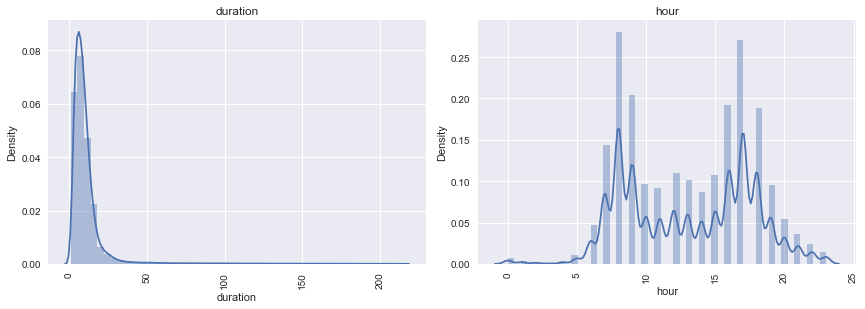

In [29]:
graph_by_cols(trip_df, trips_continuous_columns, 2) 

<li>Se aprecia a simple vista que se los viajes no suelen durar más de 50 minutos</li>
<li>En la variable hora, las horas más utilizadas son las de ida y vuelta del trabajo.</li>

##### Análisis de conteo de variables categóricas

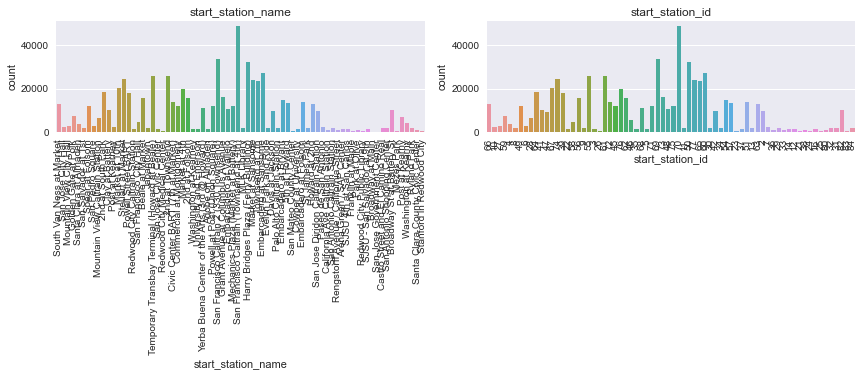

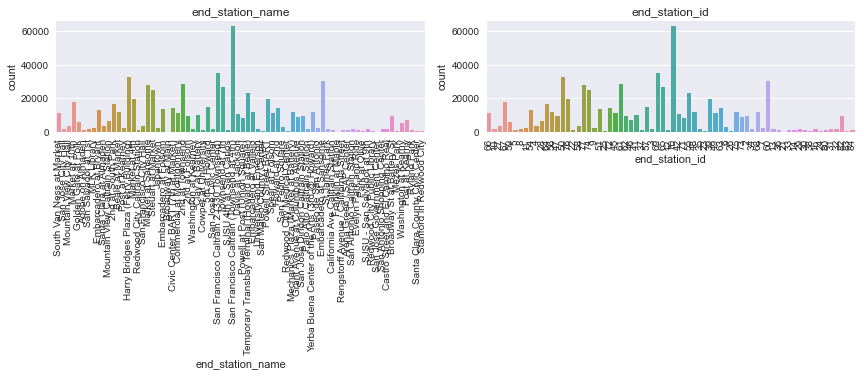

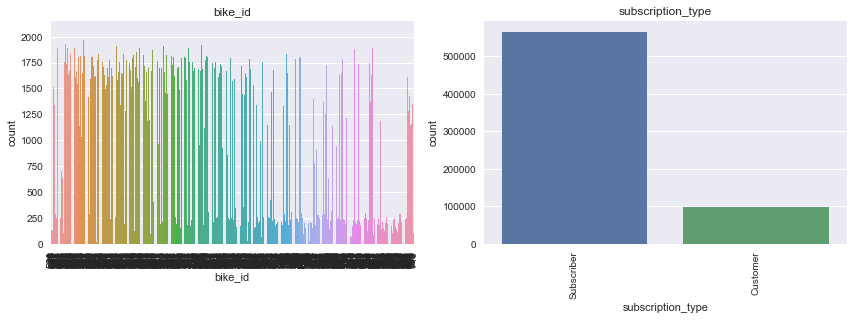

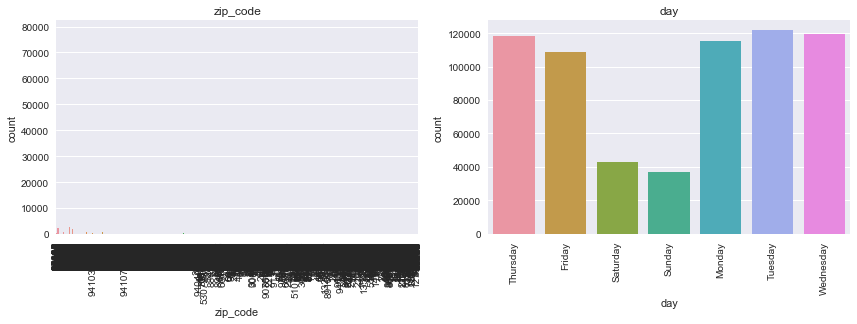

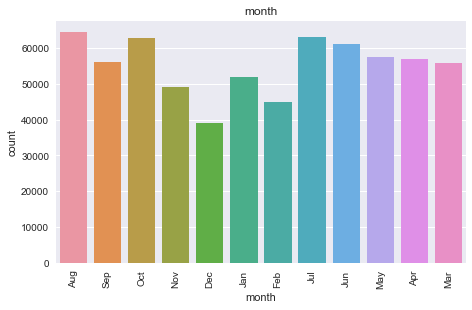

In [30]:
graph_by_cols(trip_df, trips_categorical_columns, 2,2) 

<ul>
<li>Se observa que es mayor el numero de subscriptores que no subscriptores. </li>
<li>Que los fines de semana disminuye considerablemente el uso de las bicicletas.</li>
<li>Que muchas  bicicletas que no se ocupan.</li>
<li>Los meses más fríos baja el uso del servicio.</li>
</ul>


##### Análisis visual de valores nulos

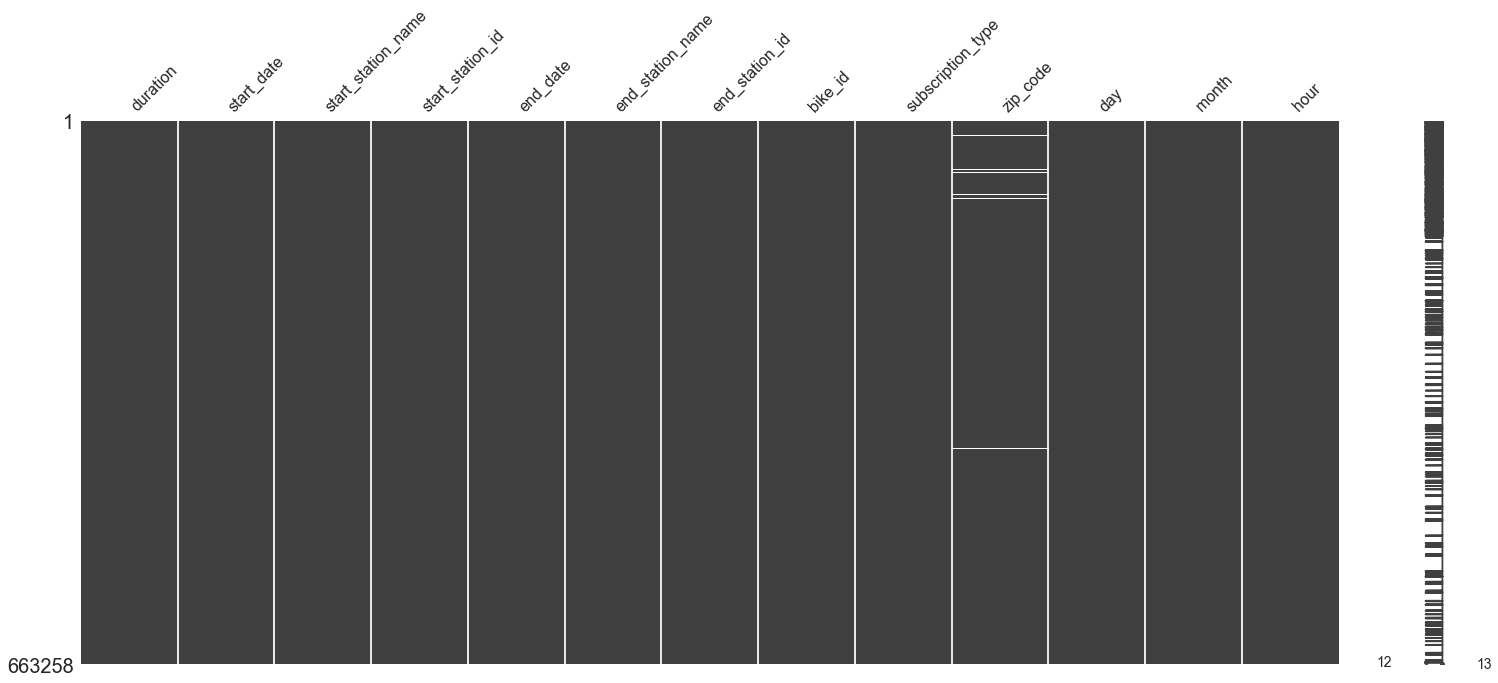

In [31]:
msgn.matrix(trip_df); 

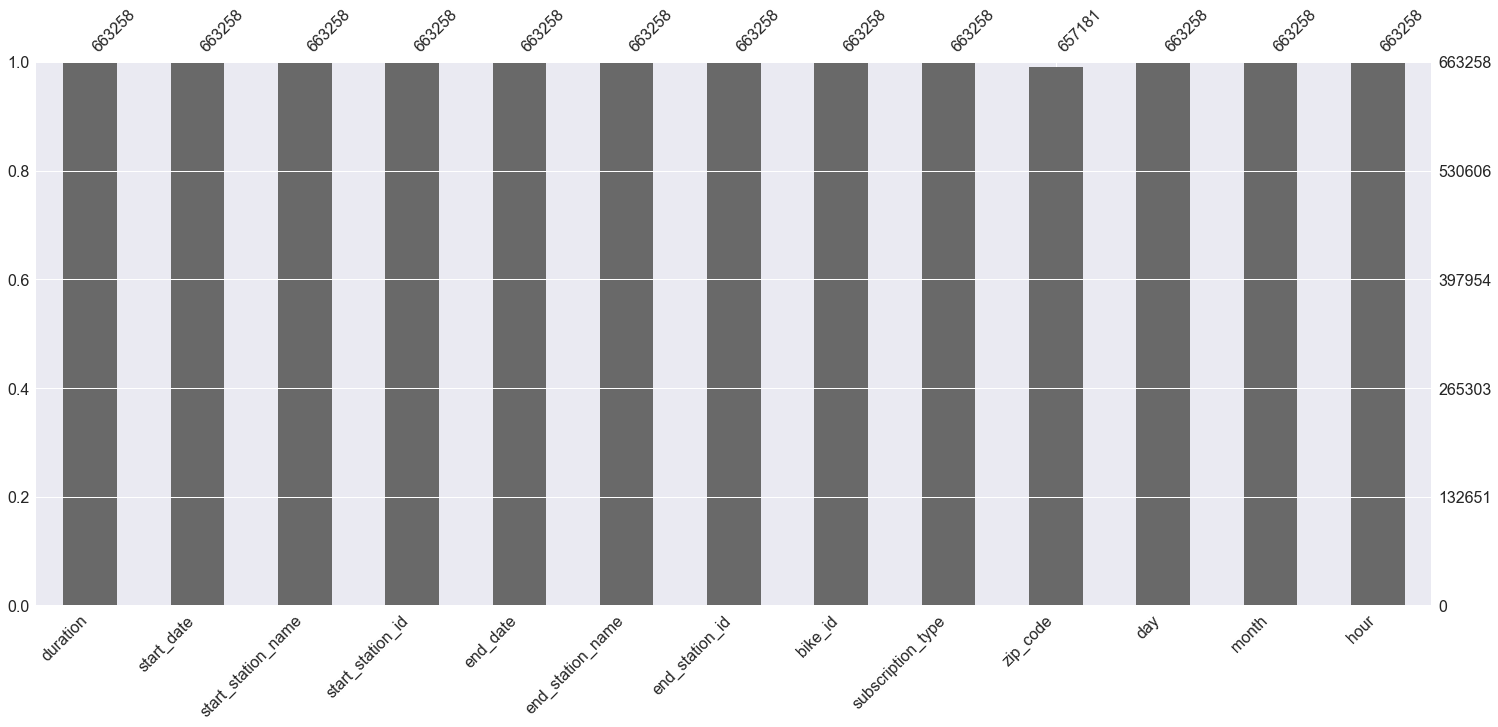

In [32]:
msgn.bar(trip_df) ;

Se observa que la variable  zip_codes posee valores nulos por lo que se procederá a eliminarlos debio a que son muy pocos.


In [33]:
trip_df = trip_df.dropna() 

##### Análisis visual de correlación pearson de variables

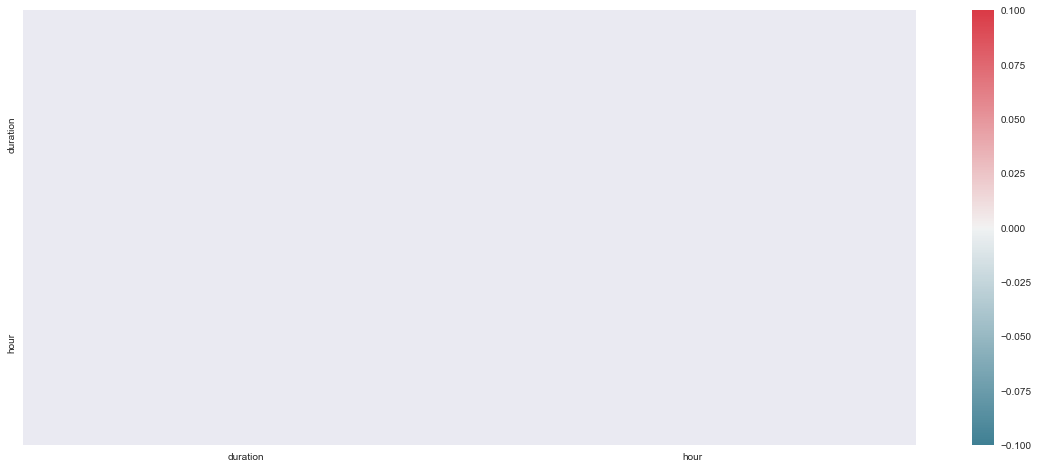

In [34]:

# heatmap con las correlaciones de las variables
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20,8)
corr = trip_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr[abs(corr)>0.6], annot=True, mask = mask, cmap = cmap);

No hay indicios de correlaciones que me indique que deba eliminar variables

In [35]:
trip_continuous_columns = trip_df.columns

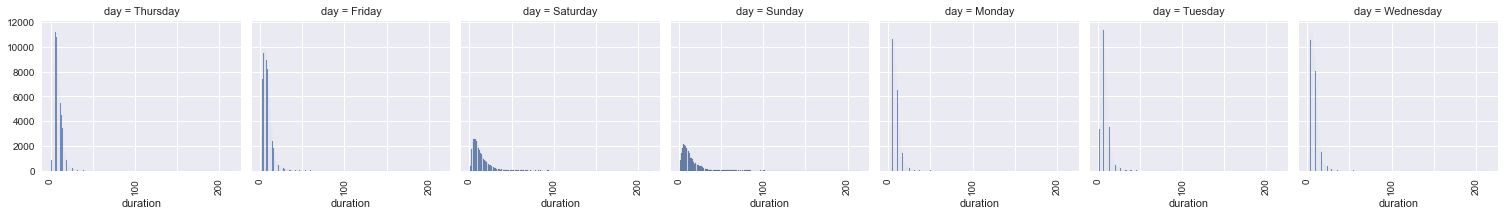

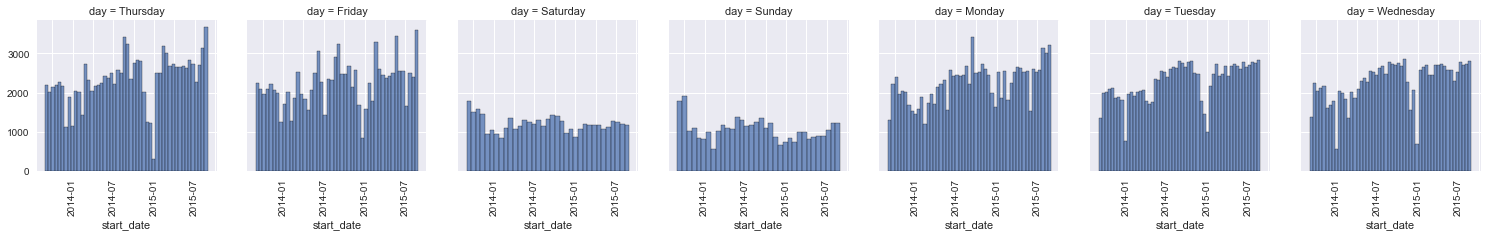

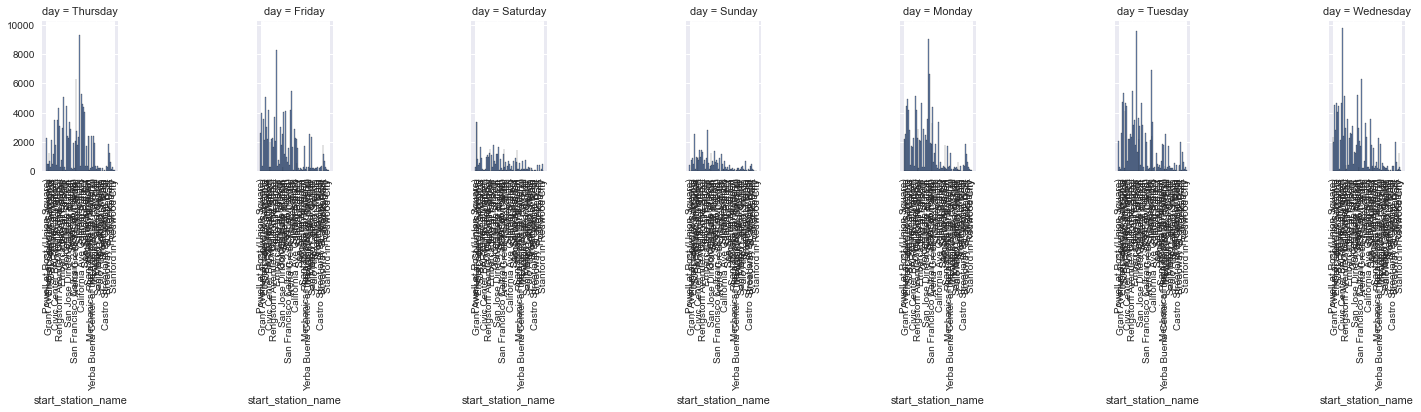

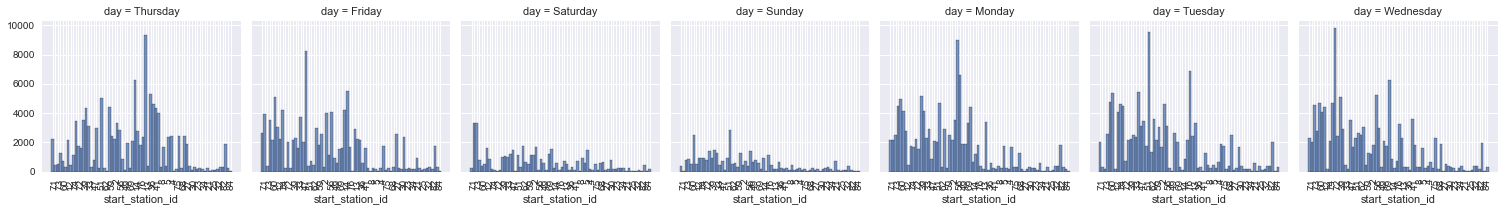

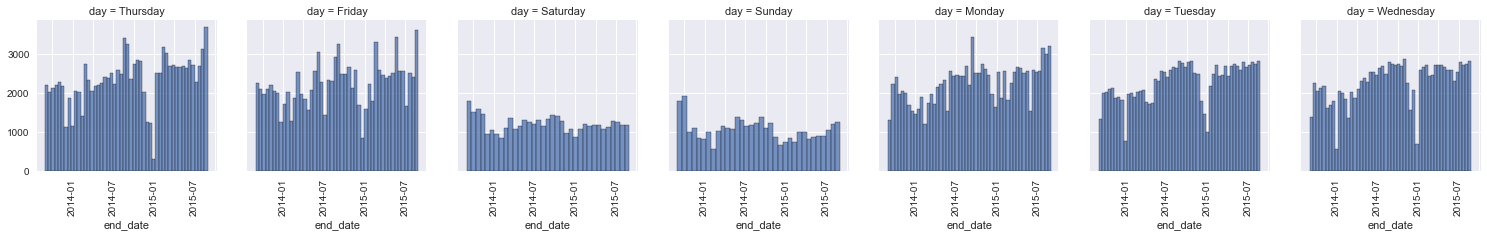

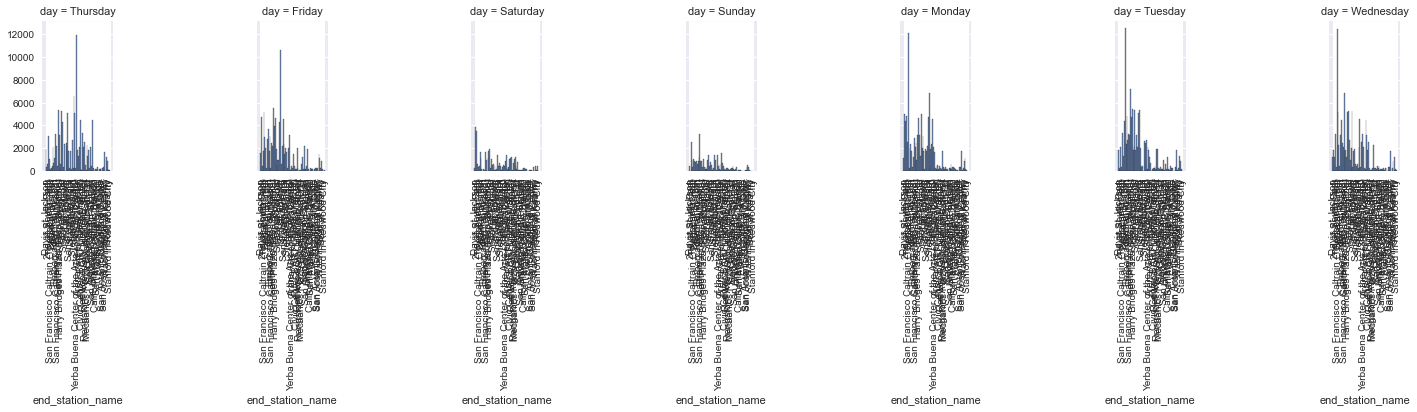

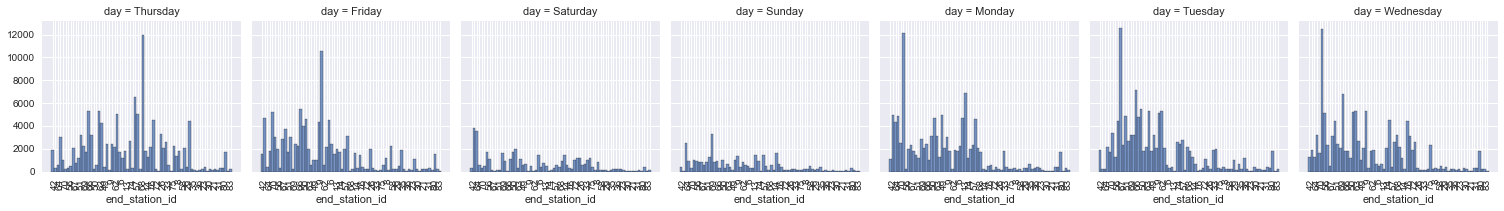

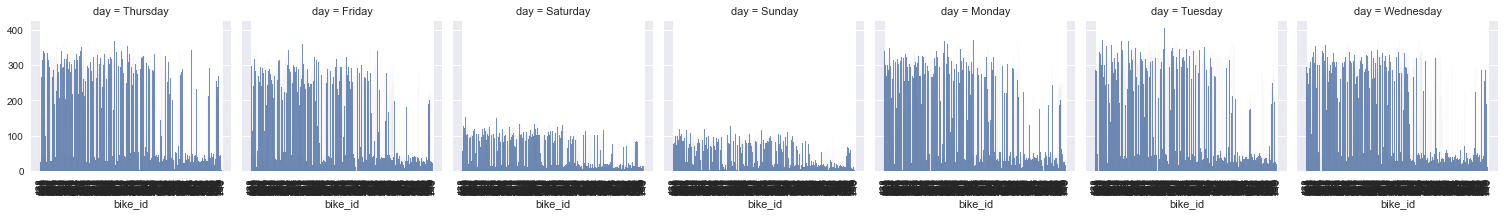

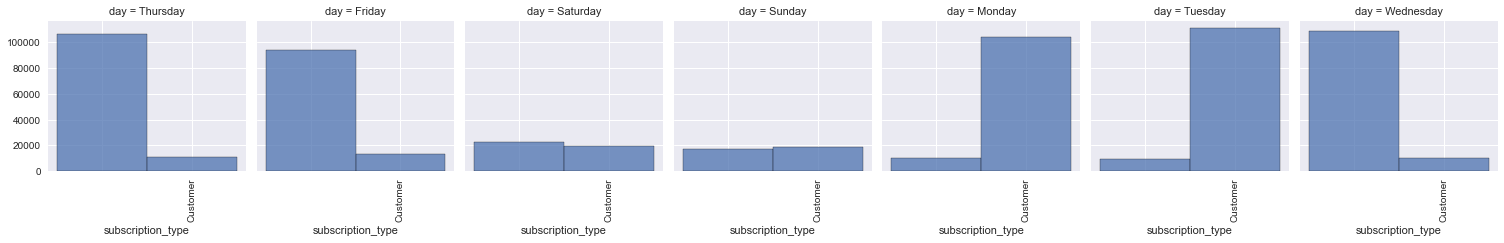

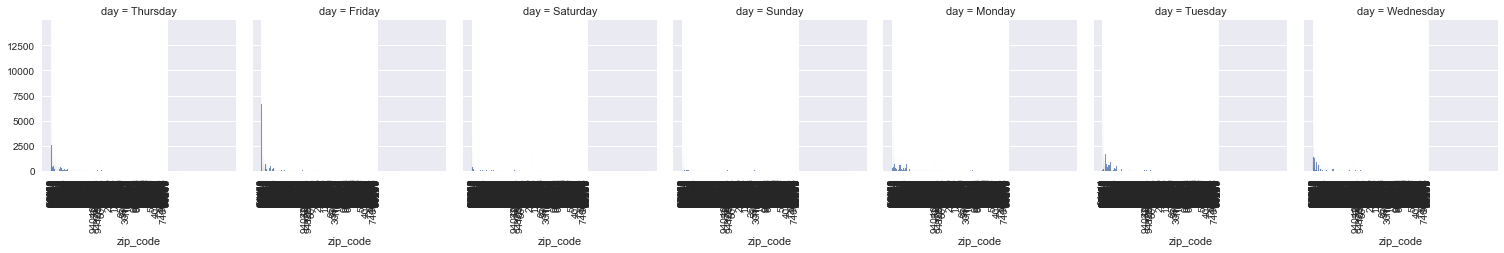

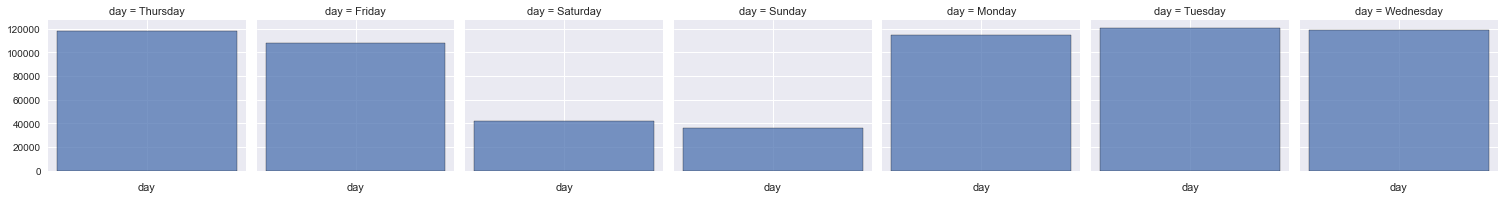

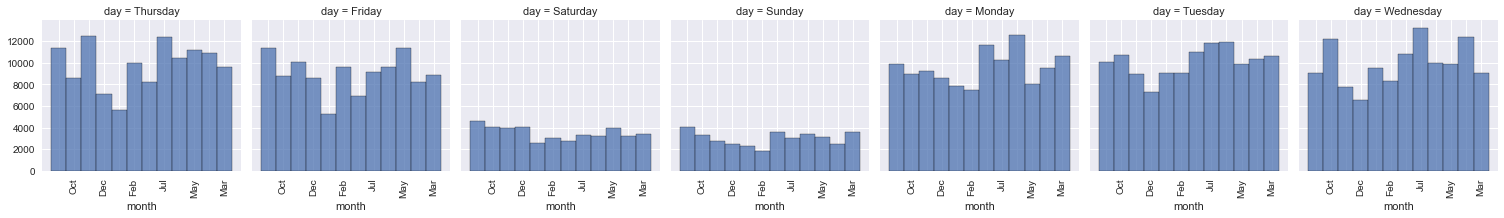

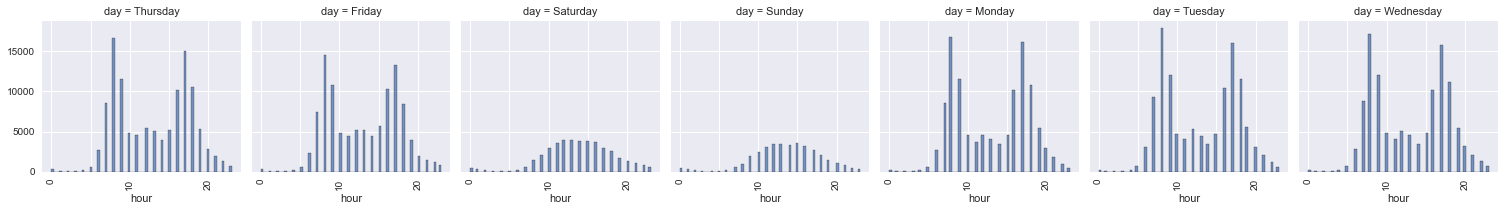

In [36]:
for i in range(len(trip_continuous_columns)):
    grouped_histplot_sb(trip_df,  trip_continuous_columns[i], 'day') 

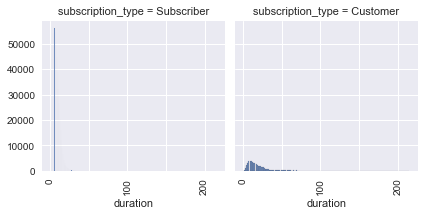

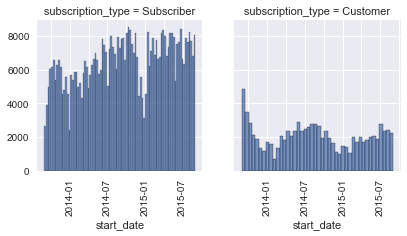

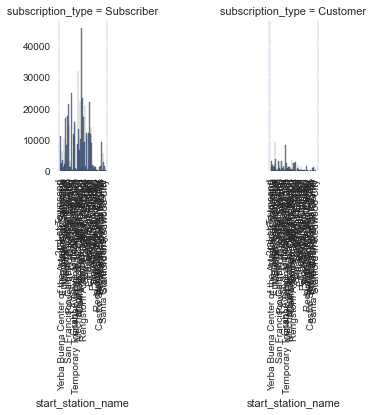

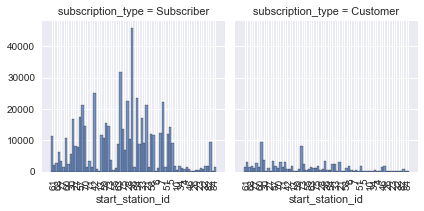

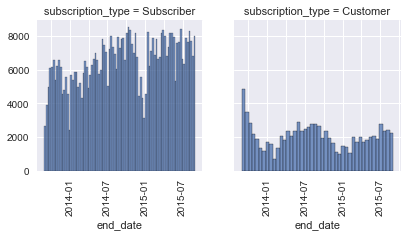

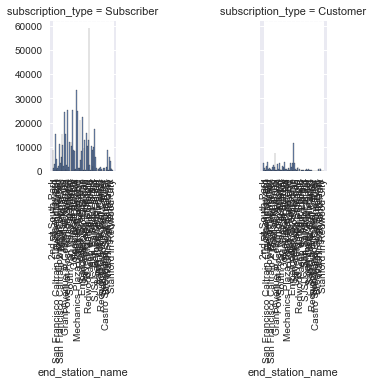

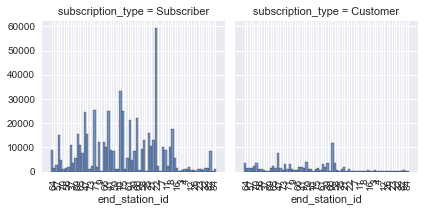

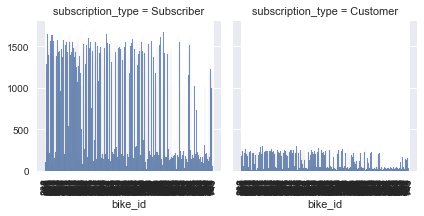

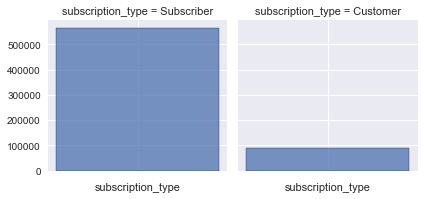

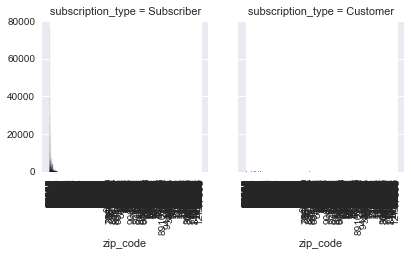

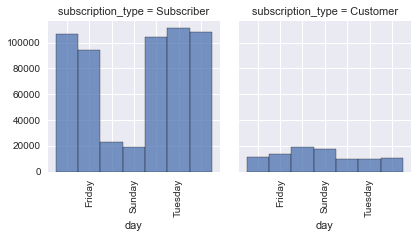

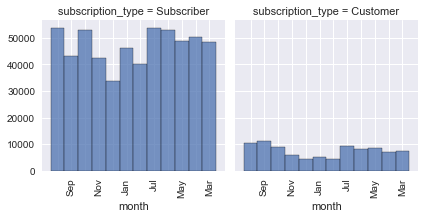

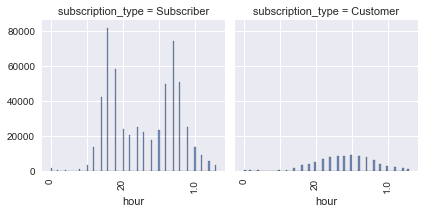

In [37]:
for i in range(len(trip_continuous_columns)):
    grouped_histplot_sb(trip_df,  trip_continuous_columns[i], 'subscription_type') 

##### Concluciones análisis visual
<ul>
<li>Los usuarios subscriber son mas propensos a usar el servicio los días Miercoles, Jueves, Viernes y Sabados. Mientras que los usuarios customers son mas propensos a usar el servicio los días Domingo, Lunes y Martes </li>

<li>Los usuarios subscribers prefieren usar el servicio como medio de transporte hacia el trabajo y los usuarios customers como medio recreativo</li>

<li>El análisis multivariado concluye que el clima y el día de la semana influye en el uso del servicio </li>


<li>Hay  muchas bicicletas que no se están utilizando</li>


### Dataset de estaciones

#### Análisis descriptivo previo al procesado

In [39]:
explorador_df(station_df)

el dataset contiene 7 columnas y 70 registros 

Las columnas y el tipo de dato de cada columna son las siguientes: 
 
 id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object
 
 
Los valores unicos de cada columna son los siguientes: 
 
 

 
 Columna id:
 
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 41 42 45 46 47 48 49 50 51 39 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 80 82 83 84] 
 


 
 Columna name:
 
 ['San Jose Diridon Caltrain Station' 'San Jose Civic Center'
 'Santa Clara at Almaden' 'Adobe on Almaden' 'San Pedro Square'
 'Paseo de San Antonio' 'San Salvador at 1st' 'Japantown'
 'San Jose City Hall' 'MLK Library' 'SJSU 4th at San Carlos'
 'St James Park' 'Arena Green / SAP Center' 'SJSU - San Salvador at 9th'
 'Franklin at Maple' 'Red

##### Observaciones análisis descriptivo

Este dataset solo contiene la ubicación de las estaciones, por lo que será utilizado de puente entre los dataframe anteriores.
Solo se recodificarán la latitud y longitud para graficarlo con folium.

In [40]:
station_df["lat"] = station_df["lat"].apply(lambda x:str(x))
station_df["long"] = station_df["long"].apply(lambda x:str(x))

#### Análisis visual

In [41]:

heatmap = folium.Map([station_df["lat"].median(),station_df["long"].median()],zoom_start=8)

stations_loc = [[float(station_df.lat.values[i]),float(station_df.long.values[i])] for i in range(len(station_df))]
heatmap.add_child(HeatMap(stations_loc,radius=10))
for index,row in station_df.iterrows():
    folium.Marker([float(row['lat']),float(row['long'])],popup=row['name']).add_to(heatmap)
heatmap

### Dataset de status

#### Análisis descriptivo previo al procesado

In [42]:
explorador_df(status_df)

el dataset contiene 4 columnas y 71984434 registros 

Las columnas y el tipo de dato de cada columna son las siguientes: 
 
 station_id          int64
bikes_available     int64
docks_available     int64
time               object
dtype: object
 
 
Los valores unicos de cada columna son los siguientes: 
 
 

 
 Columna station_id:
 
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 41 42 45 46 47 48 49 50 51 39 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 80 82 83 84] 
 


 
 Columna bikes_available:
 
 [ 2  3  4  1  5  8  9 10 11 13 15 14 12  7  6 16 17 19 18 20 21 22 23  0
 24 25 26 27] 
 


 
 Columna docks_available:
 
 [25 24 23 26 22 19 18 17 16 14 12 13 15 20 21 11 10  8  9  7  6  5  4 27
  3  2  0  1] 
 


 
 Columna time:
 
 ['2013/08/29 12:06:01' '2013/08/29 12:07:01' '2013/08/29 12:08:01' ...
 '2015-06-02 14:46:02' '2015-06-02 14:47:02' '2015-06-02 14:48:02'] 
 



Debido a lo masivo del dataset, se procede a recortarlo obteniendo solo los momentos en el tiempo donde hubo algun movimiento de bicicletas

In [43]:
status_df['data_lag'] = status_df.groupby(['station_id'])['bikes_available'].shift(1)

Para esto se simula la función LAG en pandas con el fragmento de códifo de arriba donde shift 1 te dice que tomes el valor que está antes de la columna bikes agrupado por station_id

In [44]:
status_df['data_lag_mark'] = status_df['data_lag']!=status_df['bikes_available']

Luego comparamos que la data obtenida de la función lag sobre la partición sea distinta al registro observado en el cursor y de esa manera obtenemos los momentos en el tiempo donde hubo un movimiento de bicicletas

In [45]:
shrink_status=status_df[status_df['data_lag_mark']==True]

Se obtienen variables nuevas a partir de la fecha para visualizar mas cosas de dataset y se convierten algunos tipos de dato

In [46]:

shrink_status['time'] = shrink_status['time'].astype('datetime64[ns]')

#se crean nuevas columnas para tener información adicional sobre el análisis
shrink_status['day'] = shrink_status['time'].dt.strftime('%A') #dia de la semana que inicia viaje
shrink_status['month'] = shrink_status['time'].dt.strftime('%b')#mes que inicia viaje
shrink_status['hour'] = shrink_status['time'].dt.strftime('%H').astype(int)

shrink_status = shrink_status.drop(['data_lag_mark','data_lag'], axis=1)


Estaciones de mayor tráfico

<AxesSubplot:>

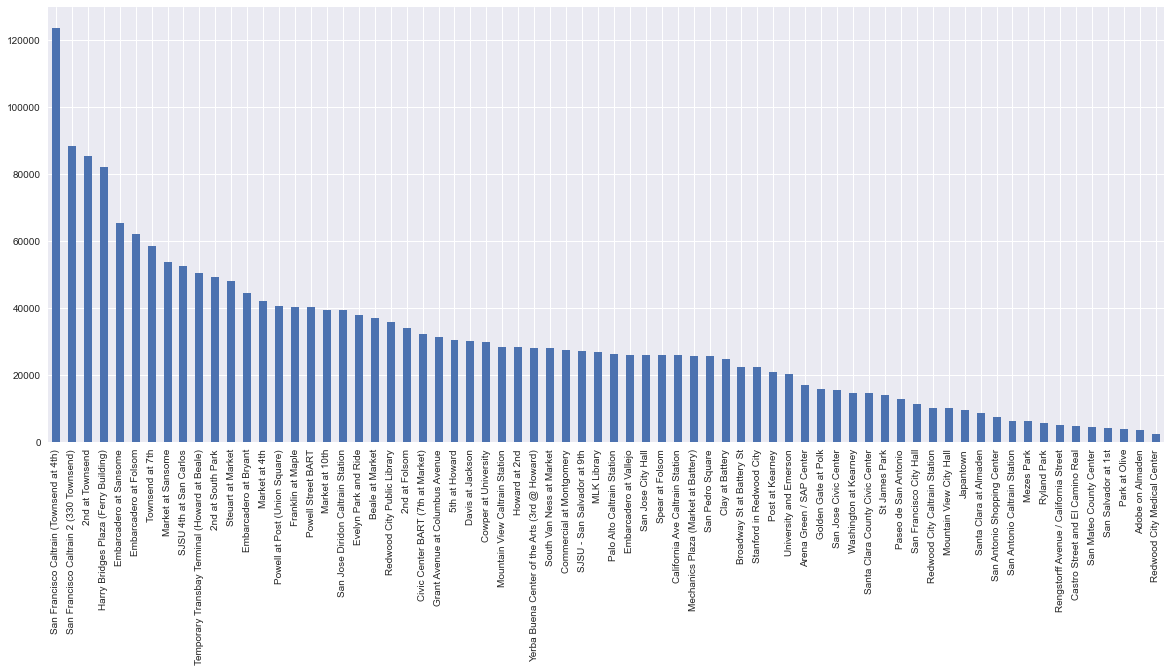

In [55]:
shrink_status['id']=shrink_status['station_id']
top_stations=pd.merge(shrink_status,station_df,on='id',how='left')
top_stations['name'].value_counts().head(90).plot.bar()

¿Cuantas veces se ha quedado sin bicicletas cada estación en toda la serie de tiempo?

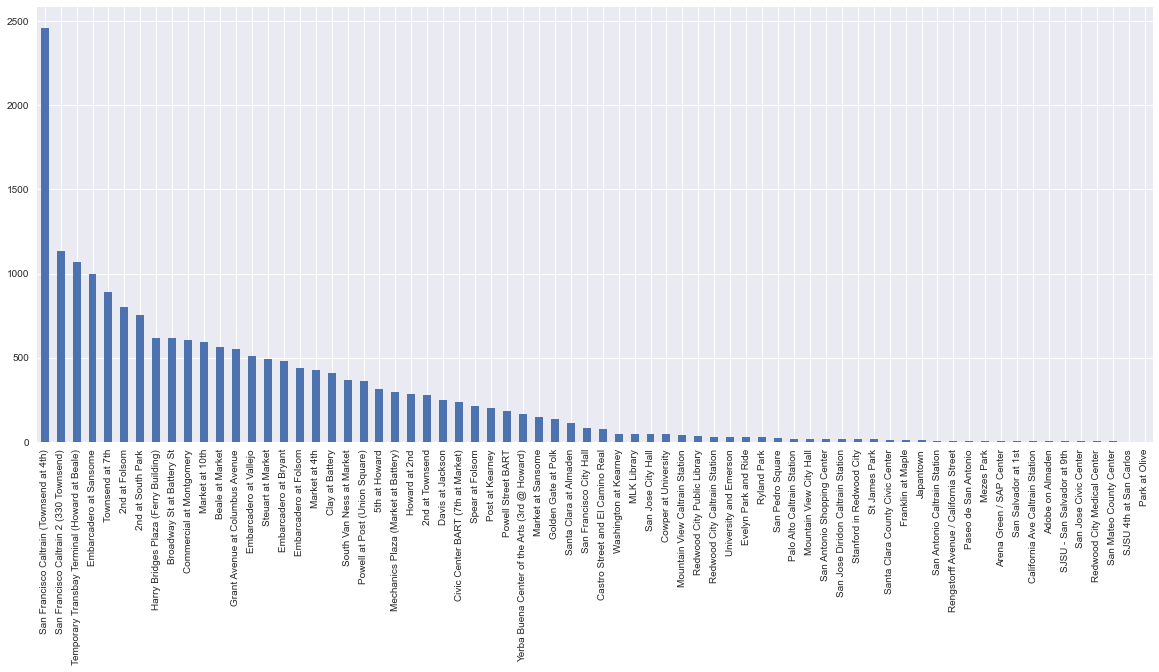

In [56]:
worst_availability=top_stations[top_stations['bikes_available']==0]
worst_availability['name'].value_counts().head(90).plot.bar();

¿Cuáles son las peores estaciones para aparcar?

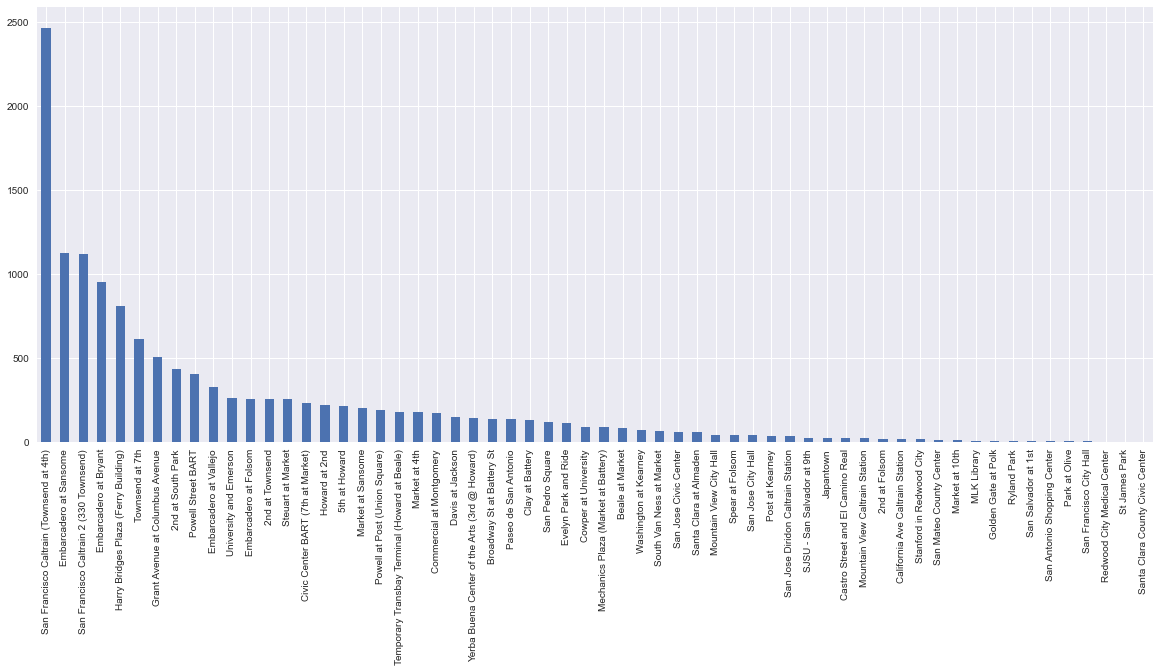

In [57]:
worst_parking=top_stations[top_stations['docks_available']==0]
worst_parking['name'].value_counts().head(90).plot.bar();

Es evidente el desbalance que está afectando la experiencia de usuarios.
Las bicicletas se acaban más rapido en las zonas mas concurridas las cuales corresponden a casi la mitad de todas las estaciones existentes. 
Hay estaciones que casi no se ocupan y podría ser que tan solo cerrando aquellas estaciones se pueda mejorar la experiencia de usuario.

#### Análisis visual

##### Separación de variables categóricas y continuas
A continuación se procede a separar las variables segun su naturaleza para facilitar taréas de exploración visual

In [58]:
shrink_status_continuous_columns = shrink_status.select_dtypes(include=continuous).columns
shrink_status_categorical_columns = shrink_status.select_dtypes(include=categorical).columns

##### Análisis de distribución de variables continuas

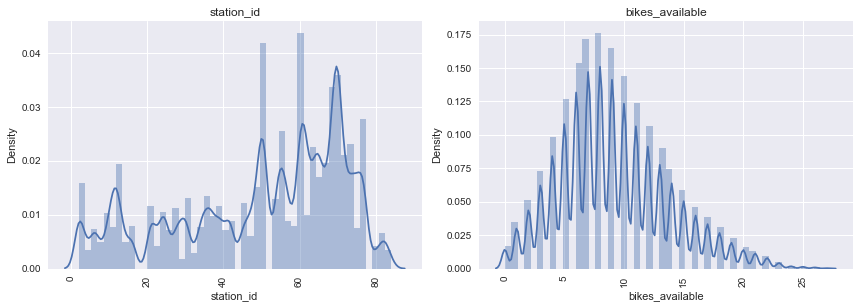

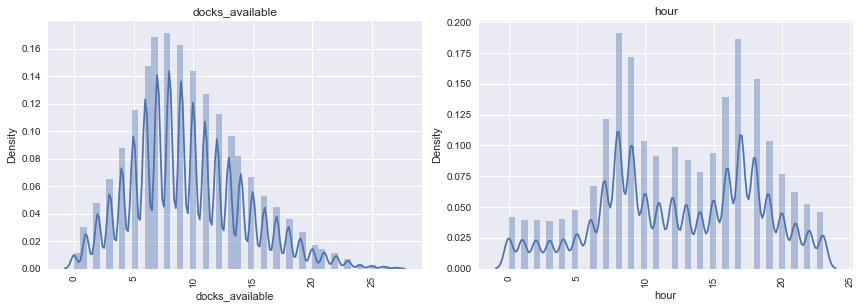

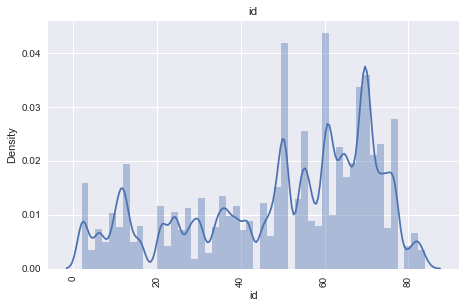

In [59]:
graph_by_cols(shrink_status, shrink_status_continuous_columns, 2) 

<li>Se puede apreciar que existe un deficit tanto de docks como de bicicletas debido a que los graficos de distribución de las variables que explican la disponibilidad están cargados hacia la izquierda</li>
<li>En la variable hora, mantiene su aspecto con respecto a la data de trips.</li>

##### Análisis de conteo de variables categóricas

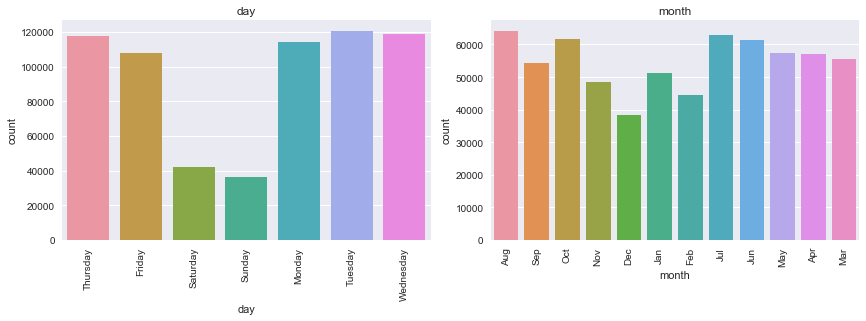

In [60]:
graph_by_cols(trip_df, shrink_status_categorical_columns, 2,2) 

<ul>
<li>Se puede apreciar que los gráficos de este dataset corresponden con los del dataset de trips</li>
</ul>


In [61]:
shrink_status_continuous_columns = shrink_status.columns

Se procede a examinar la data agrupada por día

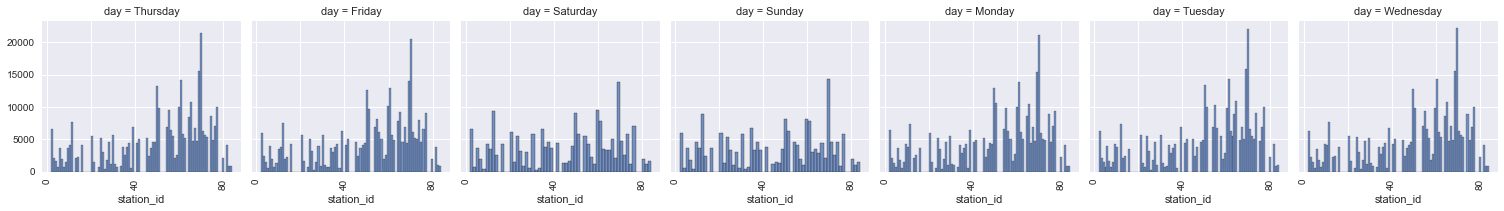

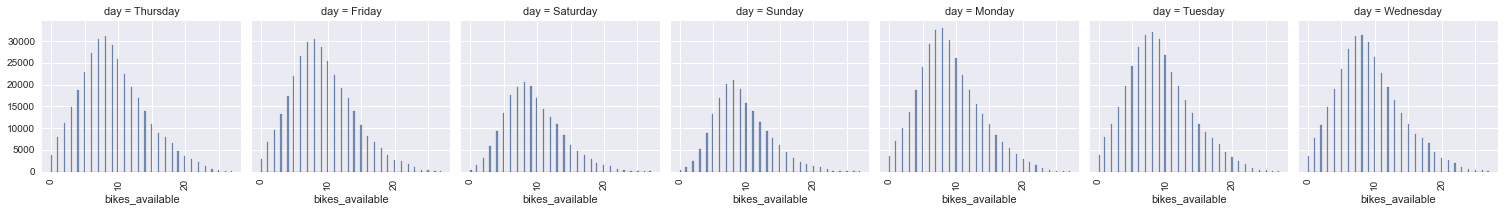

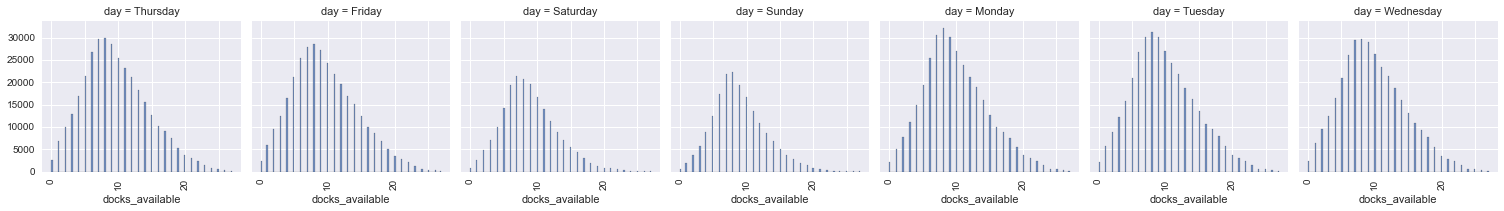

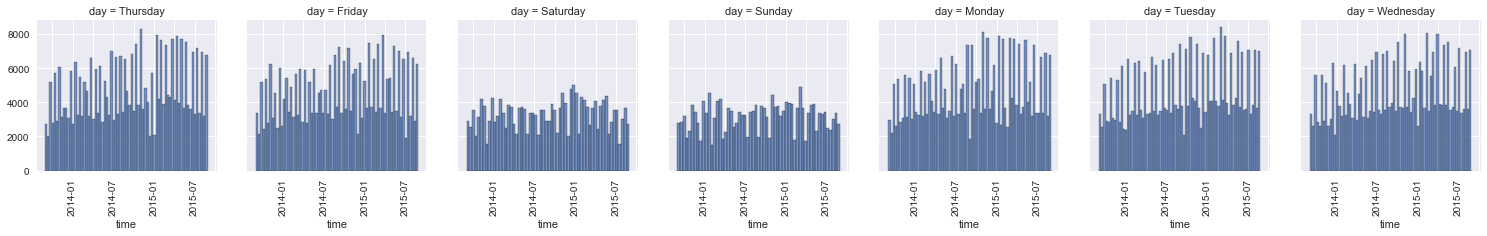

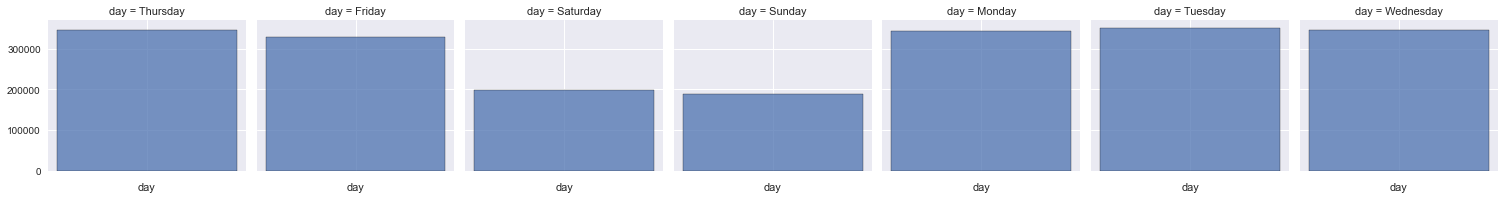

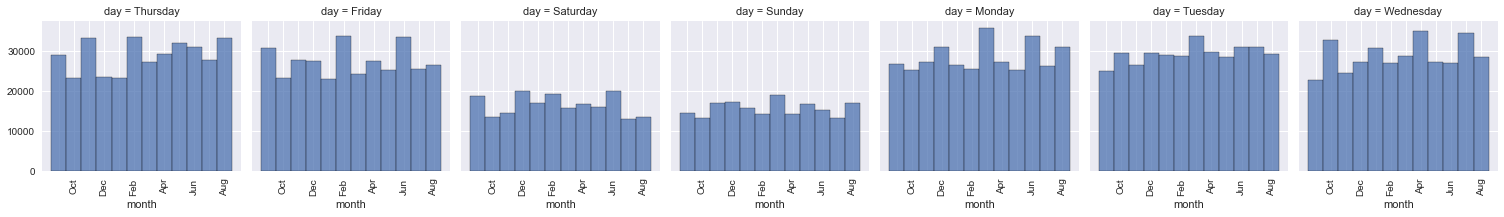

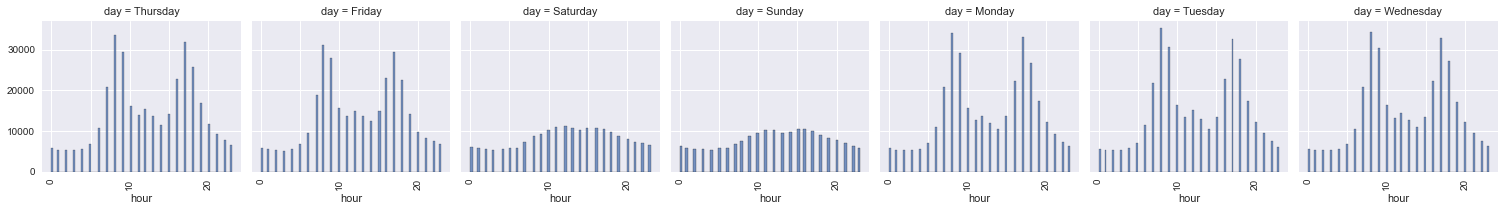

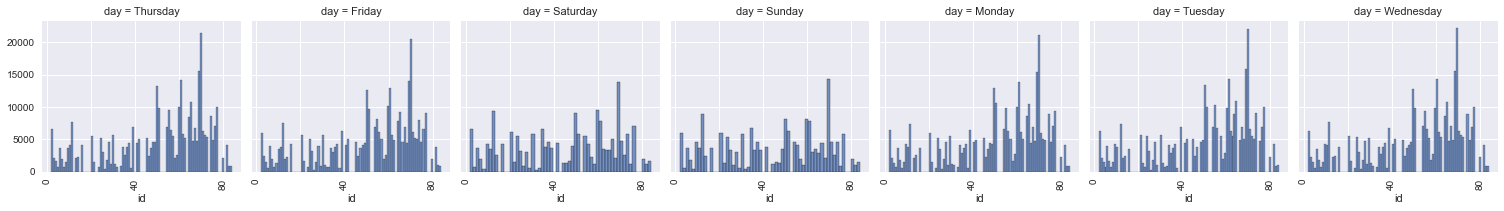

In [62]:
for i in range(len(shrink_status_continuous_columns)):
    grouped_histplot_sb(shrink_status,  shrink_status_continuous_columns[i], 'day') 

Se procede a examinar la data agrupada por station_id

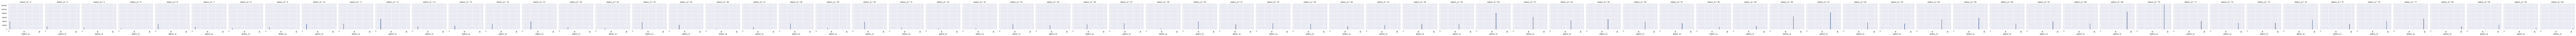

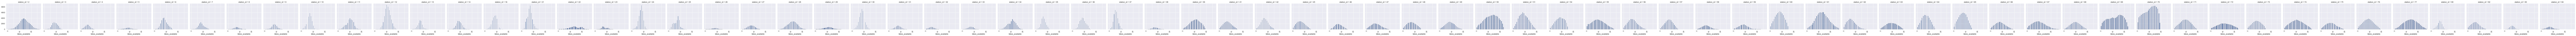

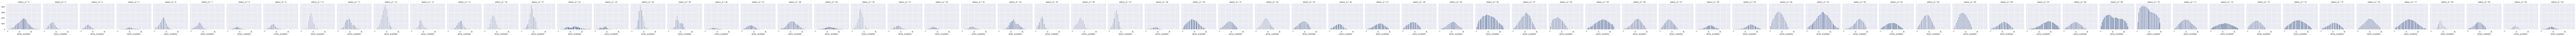

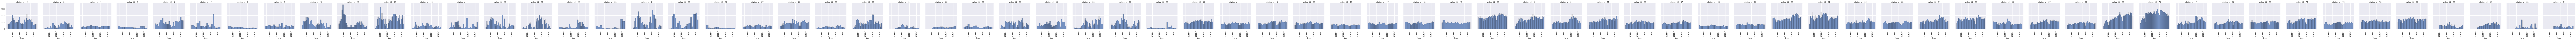

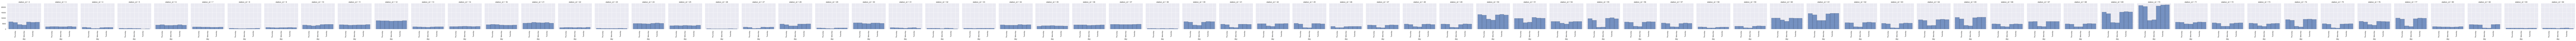

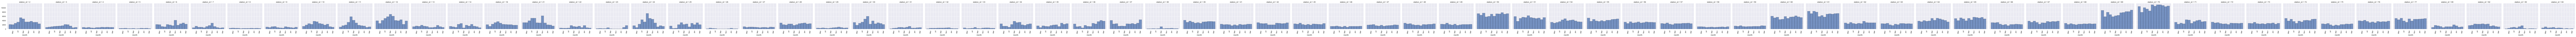

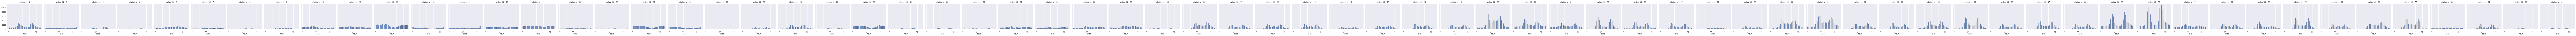

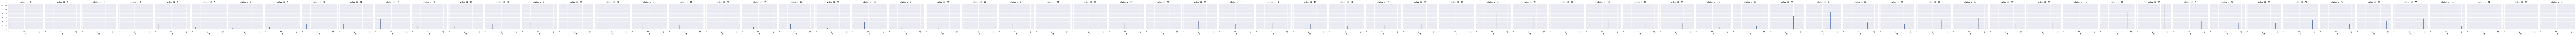

In [63]:
for i in range(len(shrink_status_continuous_columns)):
    grouped_histplot_sb(shrink_status,  shrink_status_continuous_columns[i], 'station_id') 

Análisis visual agrupado por hora

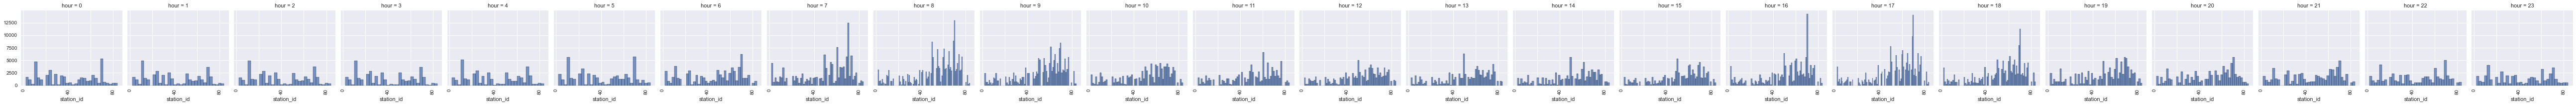

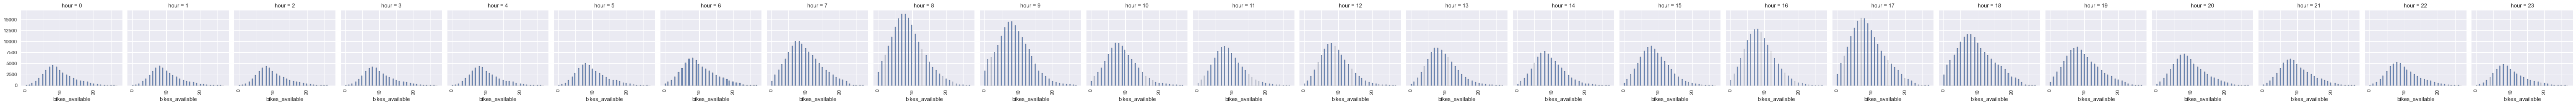

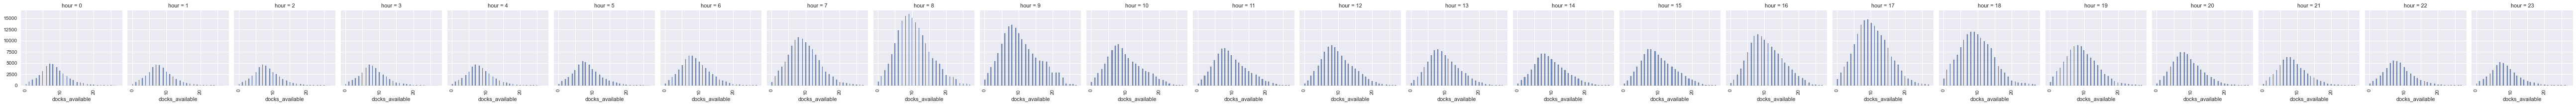

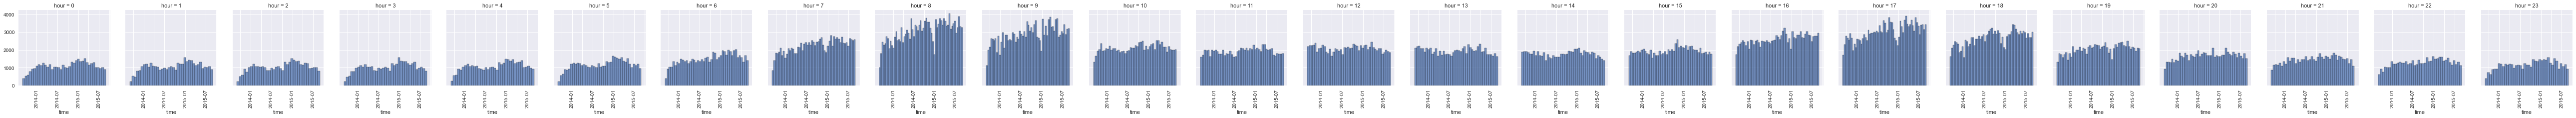

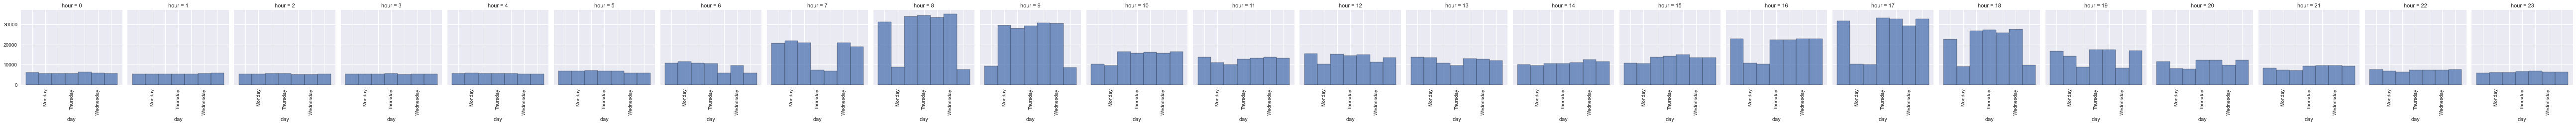

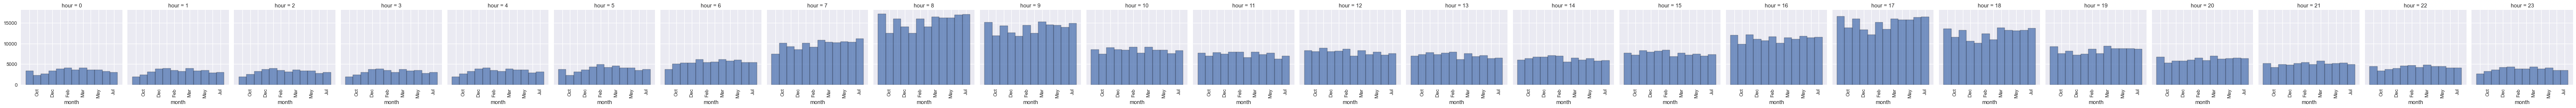

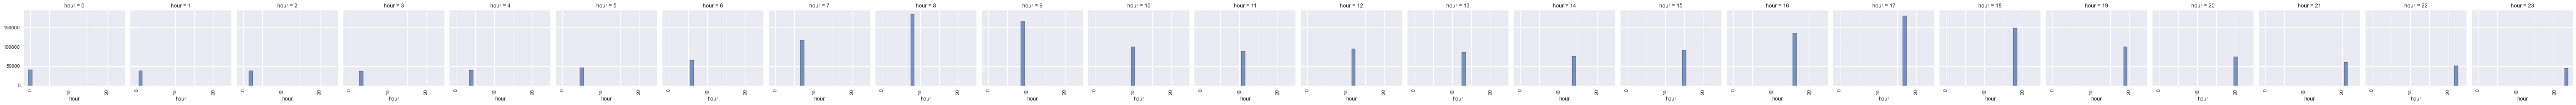

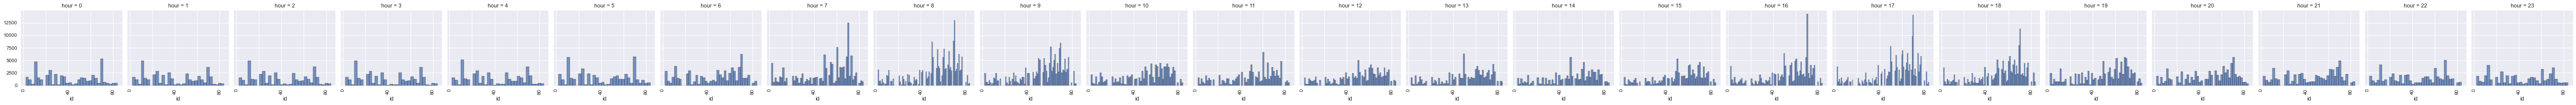

In [64]:
for i in range(len(shrink_status_continuous_columns)):
    grouped_histplot_sb(shrink_status,  shrink_status_continuous_columns[i], 'hour') 

### Conclusión

Observando los gráficos desde las distintas perspectivas se puede ver a simple vista que el problema del NPS se debe en gran medida al desbalance de disponibilidad de bicicletas.

De igual manera el NPS baja los meses cercanos a Enero, debido a este efecto las ultimas mediciones de cantidad de viaje son mas bajas de lo habitual.

## Plan de experimentación

Para revertir las bajas de manera rápida, se propone un sistema de predicción de cantidad de viajes para cada estación para que se pueda nivelar la demanda de manera dinámica y que ningun subscriptor se quede sin bicicleta.

Para esto se sugiere ejecutar un ab/test en estaciones con similar cantidad de viajes donde tendríamos como tratamiento a la estación con los viajes predichos, donde en esta se agregarán estratégicamente más docks y bicicletas en base a la demanda y un grupo control donde se aplicarán los mismos cambios que al tratamiento pero solo para competir cada día en igualdad de condiciones sin ninguna inteligencia detrás. 

Otra opción sería poner a competir dos modelos orientados a predecir variables continuas distintos u un mismo modelo con distintos hiper parámetros y ver cual me performa mejor utilizando las siguientes métricas:
<li>R cuadrado:Lo usaremos para medir qué tanto se elimina del error de predicción. (Entre mayor es mejor)</li>
<li>Media de error cuadrático (MSE):Lo usaremos para medir la precisión de la predicción. (Entre menor es mejor)</li>


Una vez aplicado arranque el experimento se deben medir las siguientes KPI para identificar mejor el impacto en el negocio:

<li>Quiebre de stock bicicletas por día.</li>
<li>Quiebre de disponibilidad de docks por día.</li>
<li>Numero de viajes de usuarios suscritos promedio por día.</li>
<li>Numero de viajes de usuarios customer promedio por día.</li>
<li>Revenue promedio por día.</li>
<li>Revenue Incremental</li>


Luego a estos KPI se le debe calcular la diferencia de medias tanto en diario como acomuladas hasta lograr ganar o perder significativamente en alguno. 


## Data para predicción

Una vez recopilada y recodificada la data necesaria, ahora solo queda identificar el vector objetivo. En este caso nº de viajes por día y armar un dataset agregado por día.


In [65]:
weather_df.head(5)

mean_temperature_f  mean_humidity  mean_sea_level_pressure_inches  \
0                68.0           75.0                           30.02   
1                69.0           70.0                           30.00   
2                64.0           75.0                           29.96   
3                66.0           68.0                           29.93   
4                69.0           77.0                           29.94   

   mean_visibility_miles cloud_cover       zip_code  wind_dir_degrees  \
0                   10.0         4.0  San Francisco             286.0   
1                   10.0         2.0  San Francisco             291.0   
2                   10.0         4.0  San Francisco             284.0   
3                   10.0         4.0  San Francisco             284.0   
4                   10.0         6.0  San Francisco             277.0   

   precipitation_inches  events       date  
0                   0.0  Normal 2013-08-29  
1                   0.0  Normal 2013-08-30  
2                   0.0  Normal 2013-08-31  
3                   0.0  Normal 2013-09-01  
4                   0.0  Normal 2013-09-02

Para utilizar la data de clima, se agregará por día. Para eso las variables categóricas serán transformadas a dummy

In [70]:
cloud_cover= pd.get_dummies(weather_df.cloud_cover,prefix='cloud_cover_')
events= pd.get_dummies(weather_df.events,prefix='events_')

weather_df = weather_df.merge(cloud_cover, left_index = True, right_index = True)
weather_df = weather_df.merge(events, left_index = True, right_index = True)

In [111]:
weather_df.head(2)

mean_temperature_f  mean_humidity  mean_sea_level_pressure_inches  \
0                68.0           75.0                           30.02   
1                69.0           70.0                           30.00   

   mean_visibility_miles cloud_cover       zip_code  wind_dir_degrees  \
0                   10.0         4.0  San Francisco             286.0   
1                   10.0         2.0  San Francisco             291.0   

   precipitation_inches  events       date  ...  cloud_cover__5.0  \
0                   0.0  Normal 2013-08-29  ...                 0   
1                   0.0  Normal 2013-08-30  ...                 0   

   cloud_cover__6.0  cloud_cover__7.0  cloud_cover__8.0  cloud_cover__nan  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   events__Fog  events__Fog-Rain  events__Normal  events__Rain  \
0            0                 0               1             0   
1            0                 0               1             0   

   events__Rain-Thunderstorm  
0                          0  
1                          0  

[2 rows x 25 columns]

Luego se agrupan sus promedios y se reincia el indice para mantener la fecha como columna

In [72]:
weather_df_gb = weather_df.groupby('date').mean().reset_index()

Se recodifica la fecha a formato datetime64 para compatibilidad de cruces left join

In [96]:

weather_df_gb['date']=weather_df_gb['date'].dt.date

Luego se procede a trabajar el dataframe de viajes individuales, de aquí obtendremos nuestro vector objetivo y además obtendremos alguna que otra variable adicionales que pueden ser relevantes para la predicción

Partimos codificando la fecha a un estandar datetime64

In [85]:
trip_df['date']=trip_df['start_date'].dt.date

Se obtienen los dummyes de las horas y se unen al dataset

In [74]:
hour_dummies= pd.get_dummies(trip_df.hour,prefix='hour')
trip_df = trip_df.merge(hour_dummies, left_index = True, right_index = True)

In [112]:
trip_df.head(3)

duration          start_date        start_station_name start_station_id  \
0         1 2013-08-29 14:13:00  South Van Ness at Market               66   
1         1 2013-08-29 14:42:00        San Jose City Hall               10   
2         1 2013-08-29 10:16:00   Mountain View City Hall               27   

             end_date          end_station_name end_station_id bike_id  \
0 2013-08-29 14:14:00  South Van Ness at Market             66     520   
1 2013-08-29 14:43:00        San Jose City Hall             10     661   
2 2013-08-29 10:17:00   Mountain View City Hall             27      48   

  subscription_type zip_code  ... hour_18 hour_19  hour_20  hour_21  hour_22  \
0        Subscriber    94127  ...       0       0        0        0        0   
1        Subscriber    95138  ...       0       0        0        0        0   
2        Subscriber    97214  ...       0       0        0        0        0   

   hour_23        date  q_trips  q_trips_subs  q_trips_cust  
0        0  2013-08-29        1             1             1  
1        0  2013-08-29        1             1             1  
2        0  2013-08-29        1             1             1  

[3 rows x 41 columns]

Se agrupan y obtiene su suma como funcion de agregación

In [86]:
hour_trips= trip_df[['date','hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']].groupby(['date']).sum().reset_index()

In [113]:
hour_trips.head(2)

date  hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
0  2013-08-29       0       0       0       0       0       0       0       0   
1  2013-08-30       1       1       0       0       0       1       6      13   

   hour_8  ...  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  \
0       0  ...       47       54       61       85       59       57       33   
1      32  ...       41       42       49       51       64       46       15   

   hour_21  hour_22  hour_23  
0       21       20        4  
1       18       12        9  

[2 rows x 25 columns]

Se procede a contar la cantidad de viajes totales, los que son hechos por subscriptores y por customers agrupado por fecha y usando count como función de agregación

In [89]:
trip_df['q_trips']=1
trip_df['q_trips_subs']=1
trip_df['q_trips_cust']=1
q_trips = trip_df[['q_trips','date']].groupby(['date']).count().reset_index()

trip_subs=trip_df[trip_df['subscription_type']=='Subscriber']
q_trips_sub = trip_subs[['q_trips_subs','date']].groupby(['date']).count().reset_index()

trip_cust=trip_df[trip_df['subscription_type']=='Customer']
q_trip_cust = trip_cust[['q_trips_cust','date']].groupby(['date']).count().reset_index()

Se procede a unir toda la data de trip agregada

In [90]:
trip_agg=pd.merge(q_trips,q_trips_sub,on='date',how='left')


In [91]:
trip_agg=pd.merge(trip_agg,q_trip_cust,on='date',how='left')


In [93]:
trip_agg=pd.merge(trip_agg,hour_trips,on='date',how='left')


In [114]:
trip_agg.head(3)

date  q_trips  q_trips_subs  q_trips_cust  hour_0  hour_1  hour_2  \
0  2013-08-29      698           459           239       0       0       0   
1  2013-08-30      618           308           310       1       1       0   
2  2013-08-31      528           159           369       6       4       2   

   hour_3  hour_4  hour_5  ...  hour_14  hour_15  hour_16  hour_17  hour_18  \
0       0       0       0  ...       47       54       61       85       59   
1       0       0       1  ...       41       42       49       51       64   
2       2       0       0  ...       71       43       50       33       41   

   hour_19  hour_20  hour_21  hour_22  hour_23  
0       57       33       21       20        4  
1       46       15       18       12        9  
2       12       11       11        3        2  

[3 rows x 28 columns]

Se procede a unir los dataframes agregados de clima y trip

In [97]:
prediction_dataframe=pd.merge(trip_agg,weather_df_gb,on='date',how='left')


Se procede a obtener el numero total de docks disponibles como variable, sumando incrementalmente desde su fecha de instalación

Se recodifica la variable para poder comparar la fecha del dataframe de predicción con la fecha de instalación para hacer la suma incremental

In [103]:
station_df['installation_date']=pd.to_datetime(station_df.installation_date)


In [105]:
station_df['installation_date']=station_df['installation_date'].dt.date

Se crea un array del mismo numero de elementos como numero de días tenga mi dataframe, utilizando un acomulador

In [106]:
dock_totales = []
for day in prediction_dataframe.date:
    dock_totales.append(sum(station_df[station_df.installation_date <= day].dock_count))

Finalmente se agrega al dataframe de prediccion

In [109]:
prediction_dataframe['dock_totales']=dock_totales

In [110]:
prediction_dataframe

date  q_trips  q_trips_subs  q_trips_cust  hour_0  hour_1  hour_2  \
0    2013-08-29      698           459           239       0       0       0   
1    2013-08-30      618           308           310       1       1       0   
2    2013-08-31      528           159           369       6       4       2   
3    2013-09-01      604           121           483       8       1       5   
4    2013-09-02      565           162           403      13       4       7   
..          ...      ...           ...           ...     ...     ...     ...   
728  2015-08-27     1432          1305           127       1       1       1   
729  2015-08-28     1219          1101           118       1       2       0   
730  2015-08-29      331           191           140       4       6       1   
731  2015-08-30      317           157           160       2       0       3   
732  2015-08-31     1360          1282            78       4       1       0   

     hour_3  hour_4  hour_5  ...  cloud_cover__6.0  cloud_cover__7.0  \
0         0       0       0  ...               0.0               0.0   
1         0       0       1  ...               0.0               0.0   
2         2       0       0  ...               0.0               0.0   
3         0       0       2  ...               0.0               0.0   
4        12       9       0  ...               0.2               0.0   
..      ...     ...     ...  ...               ...               ...   
728       1       1      13  ...               0.0               0.0   
729       0       2       6  ...               0.0               0.0   
730       0       0       1  ...               0.4               0.0   
731       1       3       0  ...               0.0               0.0   
732       1       1       4  ...               0.0               0.0   

     cloud_cover__8.0  cloud_cover__nan  events__Fog  events__Fog-Rain  \
0                 0.0               0.0          0.0               0.0   
1                 0.0               0.0          0.0               0.0   
2                 0.0               0.0          0.0               0.0   
3                 0.0               0.0          0.0               0.0   
4                 0.0               0.0          0.0               0.0   
..                ...               ...          ...               ...   
728               0.0               0.0          0.0               0.0   
729               0.0               0.0          0.0               0.0   
730               0.0               0.0          0.0               0.0   
731               0.0               0.0          0.0               0.0   
732               0.0               0.0          0.0               0.0   

     events__Normal  events__Rain  events__Rain-Thunderstorm  dock_totales  
0               1.0           0.0                        0.0          1150  
1               1.0           0.0                        0.0          1150  
2               1.0           0.0                        0.0          1150  
3               1.0           0.0                        0.0          1150  
4               0.8           0.2                        0.0          1150  
..              ...           ...                        ...           ...  
728             1.0           0.0                        0.0          1236  
729             1.0           0.0                        0.0          1236  
730             0.6           0.4                        0.0          1236  
731             1.0           0.0                        0.0          1236  
732             1.0           0.0                        0.0          1236  

[733 rows x 50 columns]

### Dimensionalidad


Debido a la gran cantidad de columnas, se procederá a ejecutar una reducción dimensional con el fin de quedarme con las variables que mejor expliquen el vector objetivo.

In [116]:
!pip install factor-analyzer

     |████████████████████████████████| 40 kB 7.9 MB/s eta 0:00:011
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=93fd3c9e5bfcaa3a485d6bab238b386b1cc471cd741e8a53269ba122e1f0ead9
  Stored in directory: /Users/administrador/Library/Caches/pip/wheels/b1/d4/b5/9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


In [117]:
import factor_analyzer as factor 

In [123]:
new_df = prediction_dataframe.loc[
    :, ['q_trips_subs', 'q_trips_cust', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'mean_temperature_f', 'mean_humidity',
       'mean_sea_level_pressure_inches', 'mean_visibility_miles',
       'wind_dir_degrees', 'precipitation_inches', 'cloud_cover__0.0',
       'cloud_cover__1.0', 'cloud_cover__2.0', 'cloud_cover__3.0',
       'cloud_cover__4.0', 'cloud_cover__5.0', 'cloud_cover__6.0',
       'cloud_cover__7.0', 'cloud_cover__8.0', 'cloud_cover__nan',
       'events__Fog', 'events__Fog-Rain', 'events__Normal', 'events__Rain',
       'events__Rain-Thunderstorm', 'dock_totales']
]
new_df.head(2)

q_trips_subs  q_trips_cust  hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  \
0           459           239       0       0       0       0       0       0   
1           308           310       1       1       0       0       0       1   

   hour_6  hour_7  ...  cloud_cover__6.0  cloud_cover__7.0  cloud_cover__8.0  \
0       0       0  ...               0.0               0.0               0.0   
1       6      13  ...               0.0               0.0               0.0   

   cloud_cover__nan  events__Fog  events__Fog-Rain  events__Normal  \
0               0.0          0.0               0.0             1.0   
1               0.0          0.0               0.0             1.0   

   events__Rain  events__Rain-Thunderstorm  dock_totales  
0           0.0                        0.0          1150  
1           0.0                        0.0          1150  

[2 rows x 48 columns]

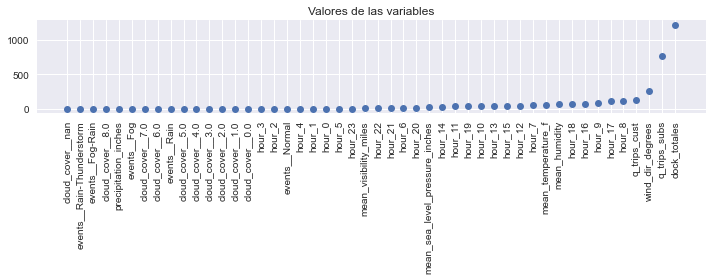

In [126]:
plt.figure(figsize=(10, 4))
variable = []
mean = []

# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in new_df.iteritems():
    # guardamos el nombre en variable
    variable.append(colname)
    # calculamos y procesamos la media
    mean.append(serie.mean())

df = pd.DataFrame({"var": variable, "mean": mean}).sort_values(by=["mean"])
plt.title("Valores de las variables")
plt.plot(df["var"], df["mean"], "o")
plt.xticks(rotation=90)
plt.tight_layout() 

Para esto utilizaré KMO debido a que un test de esfericidad arrojaría que la varianza en la muestra es muy homogénea

In [127]:
corr_new_df = new_df.corr() 

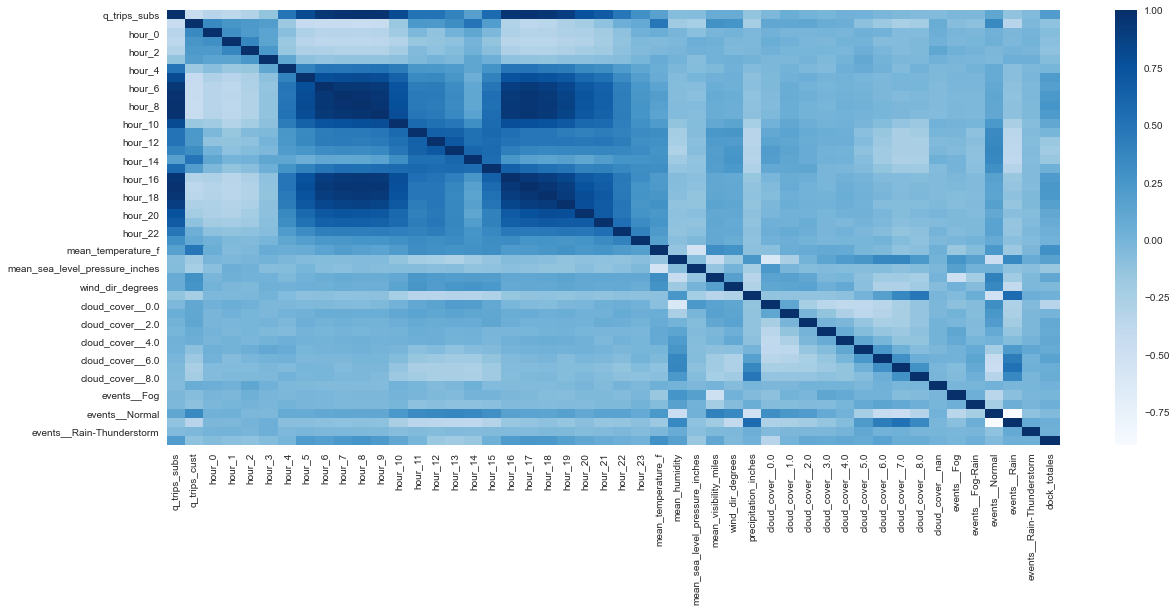

In [146]:
sns.heatmap(corr_new_df, cmap="Blues");

In [130]:
factor.calculate_kmo(new_df) 

(array([0.71027079, 0.45346692, 0.91332065, 0.88928658, 0.74614388,
        0.18119553, 0.81197864, 0.96323203, 0.98210767, 0.89944086,
        0.83790864, 0.86636567, 0.90108318, 0.87753901, 0.80746768,
        0.84407848, 0.74188155, 0.82777613, 0.87995712, 0.86103888,
        0.89728382, 0.90167832, 0.92588602, 0.9343218 , 0.93311225,
        0.89954738, 0.81991958, 0.93167613, 0.6786267 , 0.84911094,
        0.87912145, 0.90523336, 0.19212275, 0.1140972 , 0.06324233,
        0.04686564, 0.05983699, 0.09679741, 0.19084957, 0.24766047,
        0.21525191, 0.00880799, 0.20007333, 0.21025949, 0.57422838,
        0.56233104, 0.03445681, 0.73751548]),
 0.6536084842589023)

In [131]:
array_columnas_validas=factor.calculate_kmo(new_df) 

**Observaciones:** 
<li>Prueba de muestreo Kaiser-Meyer-Olkin (KMO) mide si las correlaciones parciales dentro de la matriz son cercanas a 0.</li>

<li>Se sugiere que para seguir con el análisis factorial, el KMO debe presentar valores superiores a .7. </li>


In [144]:
columnas_finales=[]
for i in range(len(array_columnas_validas[0])):
    print(array_columnas_validas[0][i])
    if array_columnas_validas[0][i]>0.7:
        columnas_finales.append(new_df.columns[i])

0.710270793448556
0.4534669210487144
0.9133206458969758
0.8892865795452986
0.7461438807482268
0.18119552597287122
0.8119786385118334
0.963232026859255
0.9821076677695036
0.8994408645243694
0.8379086410384059
0.8663656657683436
0.901083183208373
0.8775390134477109
0.8074676838834897
0.8440784834958533
0.7418815468107832
0.8277761279578116
0.8799571184746344
0.861038877239816
0.8972838212576936
0.9016783165700725
0.9258860198580778
0.9343218018028324
0.9331122473502124
0.89954737875801
0.8199195814227115
0.9316761295921788
0.6786266970992458
0.8491109424730939
0.8791214522849394
0.9052333644453974
0.1921227469338611
0.11409719682455928
0.06324232866171584
0.04686563550721609
0.059836985454306636
0.09679740735775116
0.19084957330470573
0.2476604727830885
0.21525191033833668
0.008807993717149772
0.20007333091023993
0.21025949402454994
0.5742283766477608
0.5623310396089812
0.03445680792685757
0.7375154849459342


In [147]:
columnas_finales.append('date')
columnas_finales.append('q_trips')
columnas_finales

['q_trips_subs',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'mean_temperature_f',
 'mean_humidity',
 'mean_visibility_miles',
 'wind_dir_degrees',
 'precipitation_inches',
 'dock_totales',
 'date',
 'q_trips']

In [149]:
prediction_dataframe=prediction_dataframe[columnas_finales]

In [150]:
prediction_dataframe

q_trips_subs  hour_0  hour_1  hour_2  hour_4  hour_5  hour_6  hour_7  \
0             459       0       0       0       0       0       0       0   
1             308       1       1       0       0       1       6      13   
2             159       6       4       2       0       0       1       1   
3             121       8       1       5       0       2       1       4   
4             162      13       4       7       9       0       1       3   
..            ...     ...     ...     ...     ...     ...     ...     ...   
728          1305       1       1       1       1      13      34     104   
729          1101       1       2       0       2       6      26     111   
730           191       4       6       1       0       1       1       3   
731           157       2       0       3       3       0       1       4   
732          1282       4       1       0       1       4      41     124   

     hour_8  hour_9  ...  hour_22  hour_23  mean_temperature_f  mean_humidity  \
0         0      12  ...       20        4                70.4           73.2   
1        32      27  ...       12        9                73.0           68.8   
2        13      20  ...        3        2                68.0           70.8   
3        11      18  ...       20        5                70.0           66.8   
4         8      14  ...        4        4                70.8           74.0   
..      ...     ...  ...      ...      ...                 ...            ...   
728     224     156  ...       16        8                75.2           51.8   
729     197     136  ...        9        5                78.2           63.2   
730      11      16  ...        7        2                72.0           72.2   
731       8      21  ...        4        2                70.2           64.8   
732     227     151  ...        2        7                70.8           63.8   

     mean_visibility_miles  wind_dir_degrees  precipitation_inches  \
0                     10.0             325.8                   0.0   
1                     10.0             181.8                   0.0   
2                     10.0             324.6                   0.0   
3                     10.0             318.8                   0.0   
4                     10.0             311.4                   0.0   
..                     ...               ...                   ...   
728                   10.6             319.8                   0.0   
729                   11.4             317.4                   0.0   
730                    9.8             308.0                   0.0   
731                   10.0             302.0                   0.0   
732                   11.4             239.8                   0.0   

     dock_totales        date  q_trips  
0            1150  2013-08-29      698  
1            1150  2013-08-30      618  
2            1150  2013-08-31      528  
3            1150  2013-09-01      604  
4            1150  2013-09-02      565  
..            ...         ...      ...  
728          1236  2015-08-27     1432  
729          1236  2015-08-28     1219  
730          1236  2015-08-29      331  
731          1236  2015-08-30      317  
732          1236  2015-08-31     1360  

[733 rows x 32 columns]